In [2]:
#Import modules

import psycopg2
import pandas as pd
#installieren import geopandas
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp


print("Import successfull")

Import successfull


In [3]:
#Connection to database
conn = psycopg2.connect(database="goat", user="goat", password="earlmanigault", host="localhost", port="65432")
cur = conn.cursor()
print("Opened database successfully")

Opened database successfully


In [5]:
#Load data and pre processing
data = pd.read_sql_query("SELECT * from grid_access_20;", conn, index_col=None, coerce_float=True, params=None, parse_dates=None, chunksize=None)
print("Tables selected successfully")

Tables selected successfully


In [6]:
amenities_food = ['Supermarket','Discount_Supermarket','Hypermarket','Organic']
amenities_education = ['Kindergarten','Nursery','After_school','Grundschule','Hauptschule_mittelschule','Realschule','Gymnasium']
amenities_health = ['General_Practitioner','Paediatrician','Gynaecologist','Psychotherapist','Dentist','Pharmacy']
amenities_transport = ['bus_stop','tram_stop','subway_entrance','rail_station']

In [7]:
def med(lst):
        quotient, remainder = divmod(len(lst),2)
        if remainder:
            return sorted(lst)[quotient]
        return sum(sorted(lst)[quotient-1:quotient+1])/2


amenities = [,]
val = []
for category in amenities:
    columns = ['Sum','Min','Max','Mean','Median','Q25','Q75','IQA','Variance','Standard Deviation','Coefficient of Variance']
    df = data[data['amenity']==category.lower()]
    n_nonzero = np.count_nonzero(df['ai'])
    summ = np.sum(df['ai'])
    minimum = np.min(df['ai'])
    maximum = np.max(df['ai'])
    mean = np.sum(df['ai'])/n_nonzero
    q25 = np.quantile(df['ai'],q=0.25)
    q75 = np.quantile(df['ai'],q=0.75)
    iqa = q75-q25
    median = med(df['ai'])
    quad = sum(pow((df['ai']-mean),2))
    variance = (1/n_nonzero)*quad
    deviation = np.sqrt(variance)
    covar = deviation/mean
    values = [summ, minimum, maximum, mean, median, q25, q75, iqa, variance, deviation, covar]
    val.append(values)




fig, ax = plt.subplots(dpi = 500)
ax.axis('off')
ax.axis('tight')
table = ax.table(
    cellText=val,
    rowLabels=amenities,
    colLabels=columns,
    cellLoc = 'center',
    loc = 'upper left')
fig.tight_layout()
plt.show()



SyntaxError: invalid syntax (<ipython-input-7-ed9f0b3fb24c>, line 8)

In [8]:
def stat(data, amenities):
    val = []
    columns = ['Sum','Min','Max','Mean','Median','Q25','Q75','IQA','Variance','Standard Deviation','Coefficient of Variance']
    for category in amenities:
        df1 = data[data[category.lower()]>0]
        ai = df1[category.lower()]
        n_nonzero = np.count_nonzero(ai)
        summ = sum(ai)
        minimum = np.min(ai)
        maximum = np.max(ai)
        mean = sum(ai)/n_nonzero
        q25 = np.quantile(ai,q=0.25)
        q75 = np.quantile(ai,q=0.75)
        iqa = q75-q25
        median = np.median(ai)
        quad = sum(pow((ai-mean),2))
        variance = (1/n_nonzero)*quad
        deviation = np.sqrt(variance)
        covar = deviation/mean
        values = [summ, minimum, maximum, mean, median, q25, q75, iqa, variance, deviation, covar]
        val.append(values)
    print(val)
    fig, ax = plt.subplots(dpi = 500)
    ax.axis('off')
    ax.axis('tight')
    table = ax.table(
        cellText=val,
        rowLabels=amenities,
        colLabels=columns,
        cellLoc='center',
        loc='upper left')
    fig.tight_layout()
    plt.show()

[[270856242.0, 749.0, 316403.0, 56252.594392523366, 46079.0, 22200.5, 75869.0, 53668.5, 2162810475.855212, 46506.02623161016, 0.8267356685292965], [234077470.0, 749.0, 278698.0, 49446.02239121251, 36074.0, 16395.5, 67019.5, 50624.0, 2077049968.274107, 45574.6636660558, 0.9217053559025059], [94838537.0, 733.0, 121823.0, 21842.13196683556, 16728.5, 7710.0, 30660.0, 22950.0, 354772732.1463338, 18835.411653222072, 0.8623430936971354], [72257288.0, 812.0, 67346.0, 17499.948655848875, 15598.0, 7450.0, 24530.0, 17080.0, 147871129.74015838, 12160.227372058402, 0.6948721742674474], [23116675.0, 775.0, 43908.0, 9072.4784144427, 7078.0, 3602.0, 12790.5, 9188.5, 47049714.30369414, 6859.279430355213, 0.7560535409415534], [12660091.0, 745.0, 32468.0, 8105.05185659411, 6406.0, 3118.0, 11929.5, 8811.5, 34186685.707298025, 5846.938148065022, 0.7213942922904396], [22801168.0, 752.0, 68880.0, 10512.295066851084, 7610.0, 3628.0, 14364.0, 10736.0, 87945410.99915063, 9377.92146475703, 0.8920907760978735]]


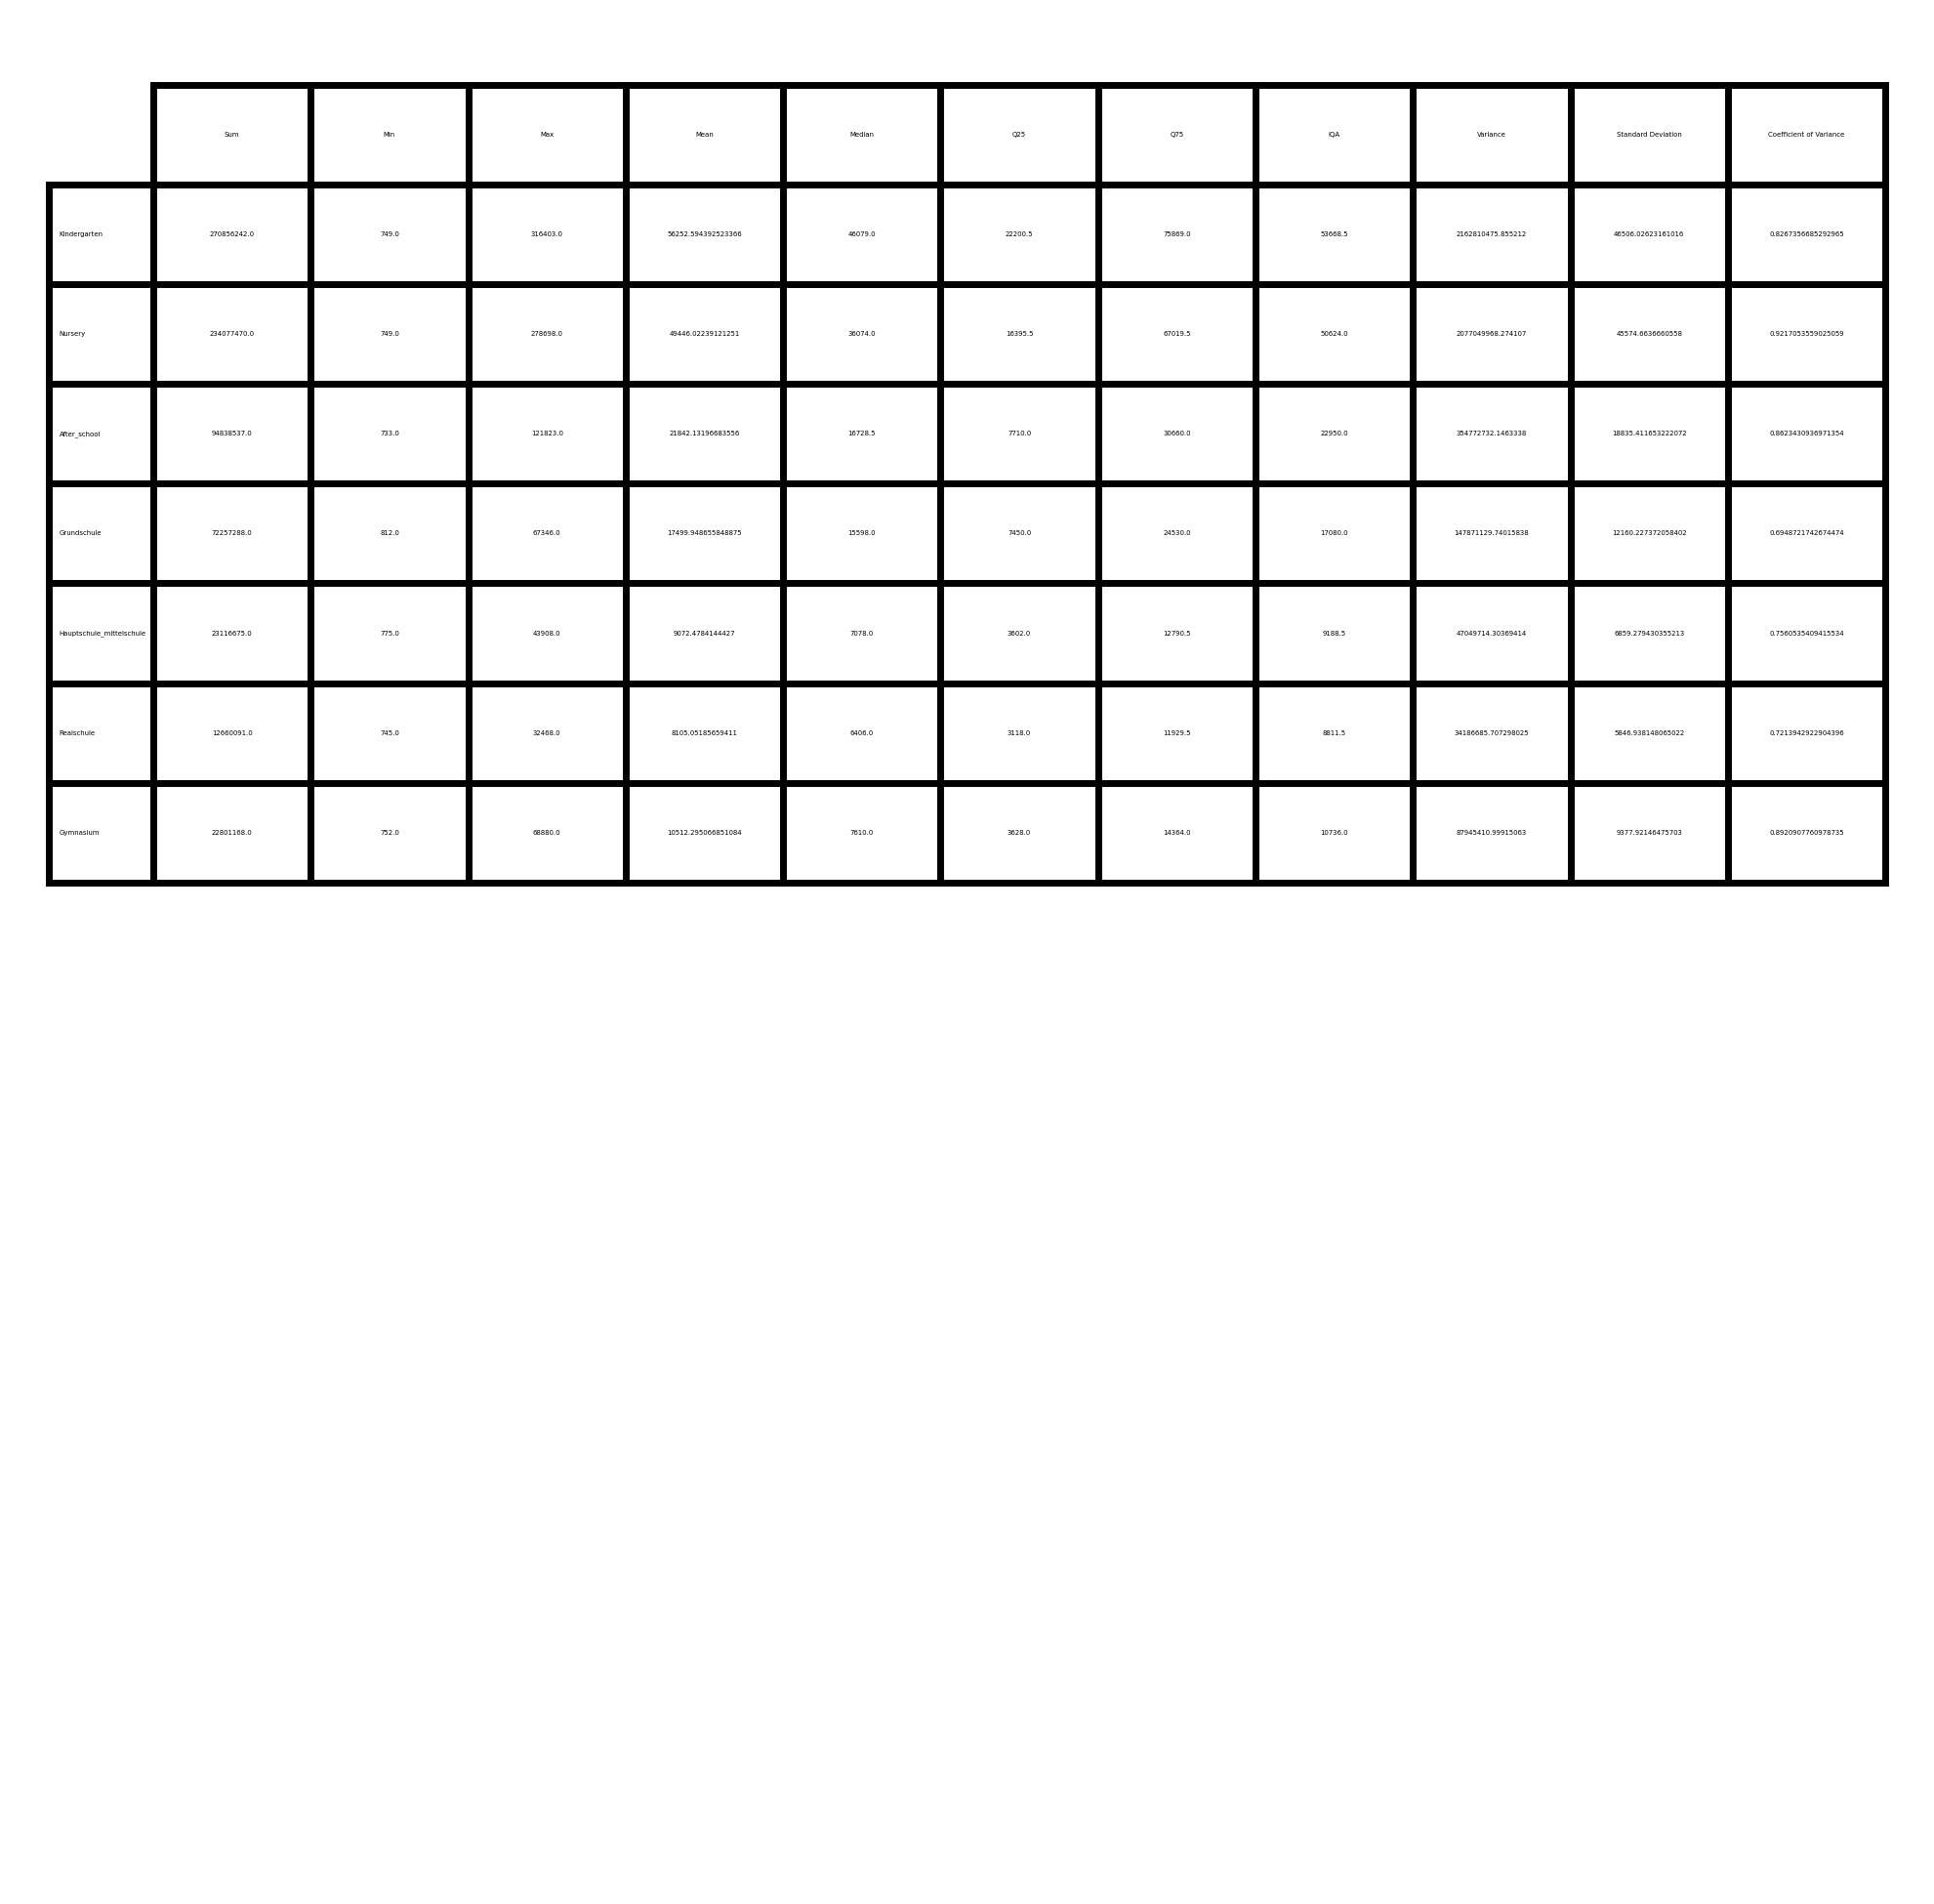

In [8]:
# Stat Education
stat(data,amenities_education)

[[74339675.0, 1107.0, 99436.0, 17900.23477004575, 12785.0, 6282.0, 23801.0, 17519.0, 280401718.83363825, 16745.19987440097, 0.9354737571611286], [59748458.0, 1099.0, 63555.0, 15091.80550644102, 11399.0, 5285.0, 21845.5, 16560.5, 154685435.3797023, 12437.25996269686, 0.8241068278668693], [3556276.0, 1115.0, 15697.0, 4248.836320191159, 3447.0, 1912.0, 5902.0, 3990.0, 7820836.153615134, 2796.575790786857, 0.6581980523695572], [23331780.0, 1103.0, 47755.0, 8748.323959505062, 6247.0, 2933.5, 11449.5, 8516.0, 62143460.59546261, 7883.112367299011, 0.9010997310786601]]


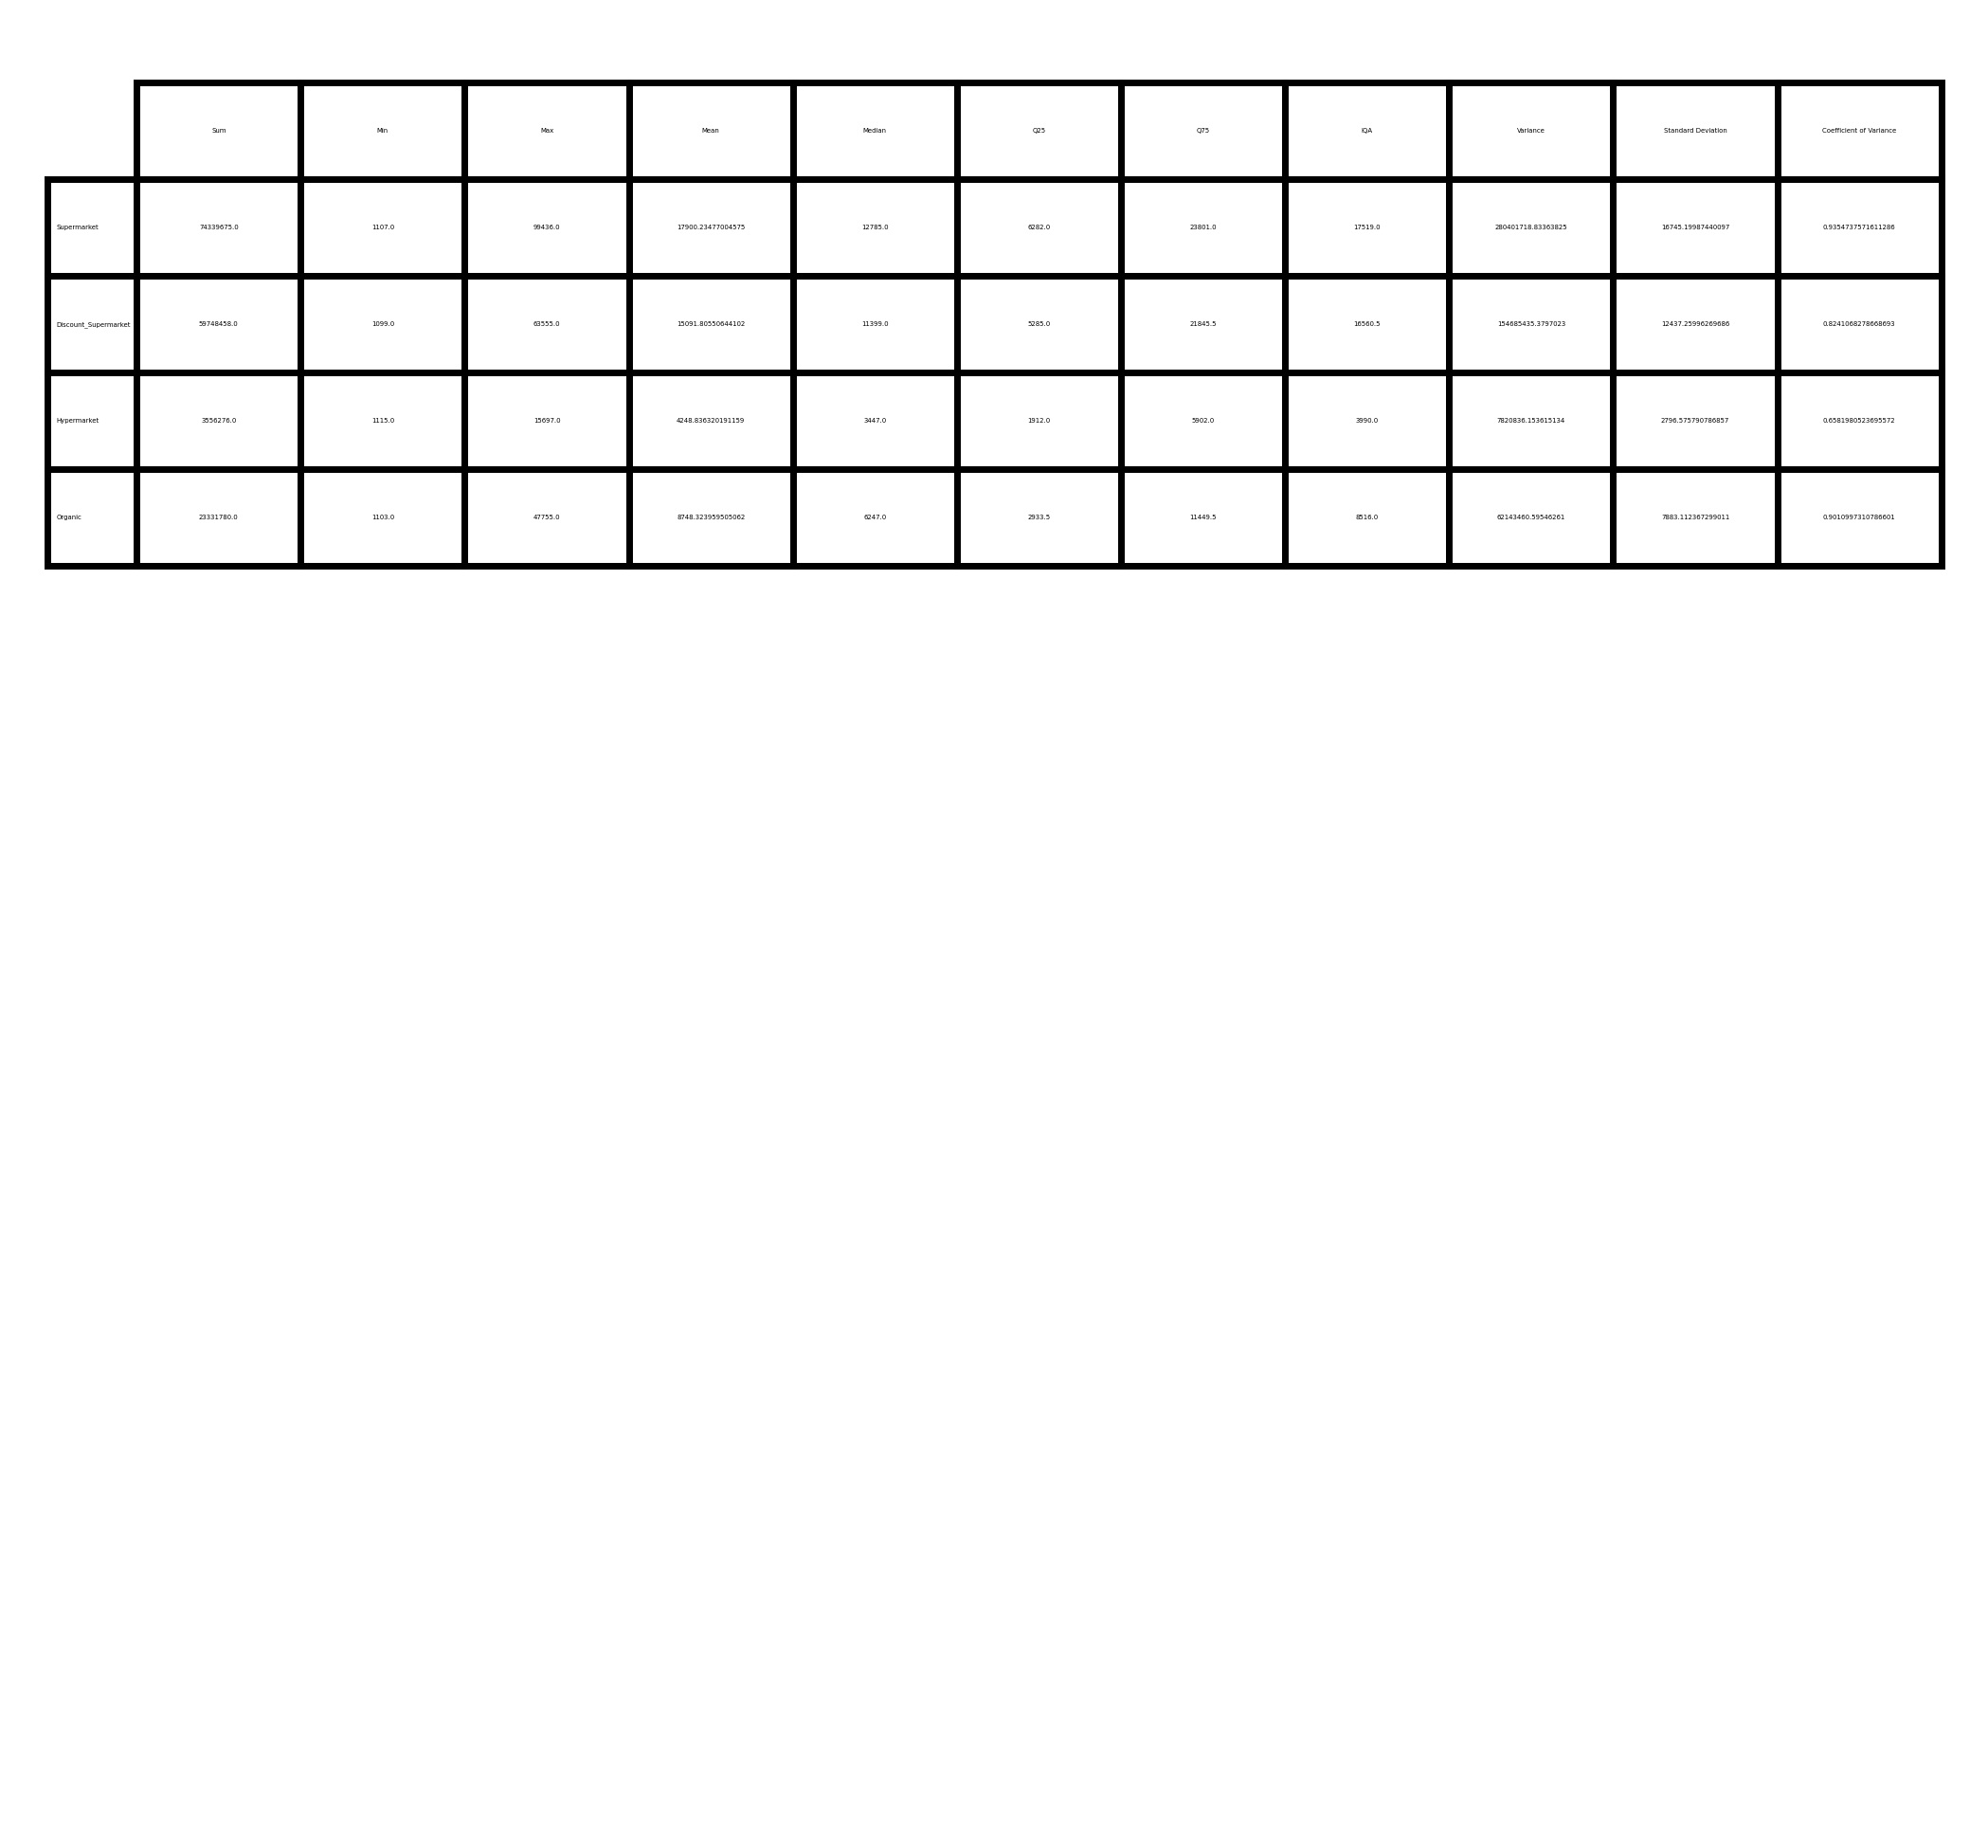

In [9]:
#Stat food retailing
stat(data,amenities_food)

[[394348105.0, 1099.0, 1157724.0, 89787.81989981786, 54804.0, 22394.0, 103914.75, 81520.75, 14531040914.591183, 120544.76726341622, 1.3425514440367958], [51384953.0, 1095.0, 78461.0, 15468.077363034317, 11694.0, 5840.0, 21529.0, 15689.0, 168551875.34410483, 12982.752995574738, 0.8393255794415007], [116706046.0, 1103.0, 733324.0, 35365.46848484848, 11665.0, 5217.75, 30674.0, 25456.25, 5336045793.550829, 73048.24291898354, 2.06552453702909], [182738390.0, 1111.0, 789659.0, 57302.724992160554, 13323.0, 4990.0, 40569.0, 35579.0, 13211730244.207508, 114942.29092987275, 2.00587827098271], [181227099.0, 1099.0, 711290.0, 45374.83700550826, 22017.0, 8639.0, 52838.25, 44199.25, 5182740306.566577, 71991.25159744466, 1.5865897565363223], [114346204.0, 1091.0, 244410.0, 27394.873981792047, 17984.5, 8083.5, 33442.5, 25359.0, 955969849.3995489, 30918.762093582416, 1.1286331199819541]]


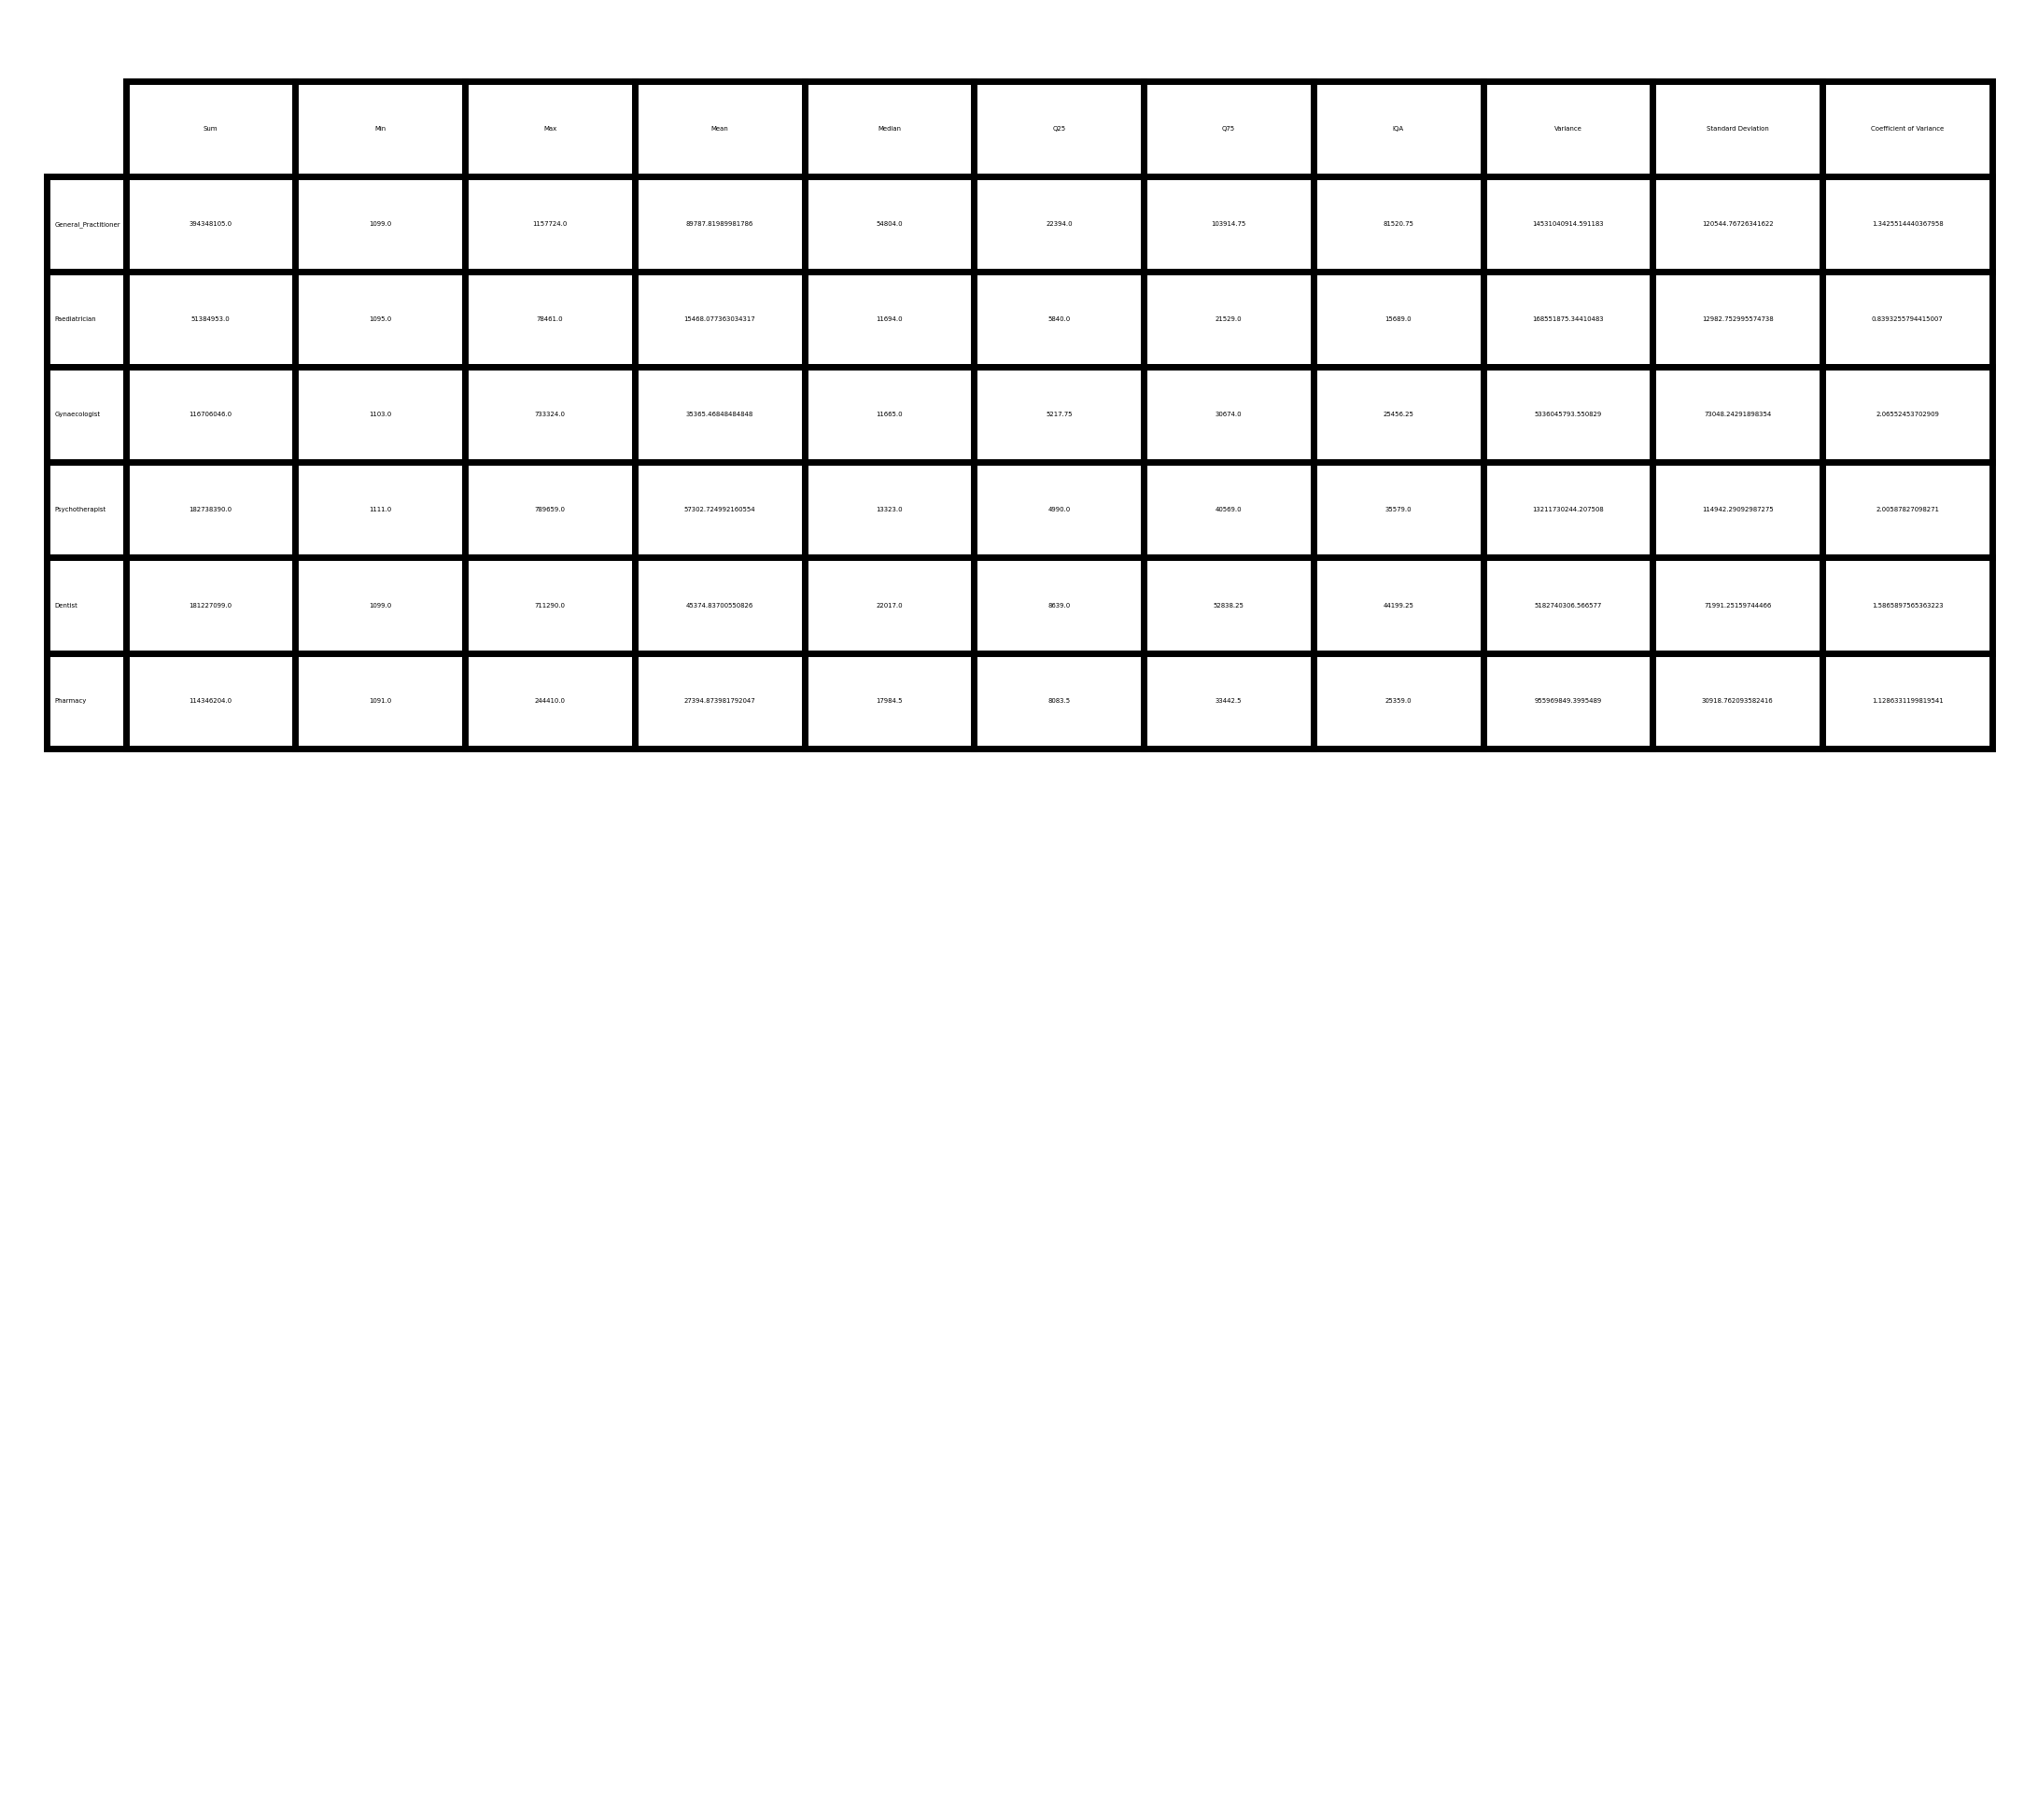

In [10]:
#stat health
stat(data,amenities_health)

[[171197861.0, 84.0, 120190.0, 33806.844589257504, 33085.0, 16294.5, 49456.25, 33161.75, 452227900.35282314, 21265.65071548066, 0.6290338827492363], [30458930.0, 84.0, 85466.0, 15352.283266129032, 11294.5, 2382.0, 24161.75, 21779.75, 227521281.56895354, 15083.80858964186, 0.9825123942912456], [21327592.0, 82.0, 42644.0, 7565.658744235545, 5719.0, 1549.5, 11623.5, 10074.0, 51701789.26346636, 7190.395626352305, 0.9503991482342286], [7350586.0, 84.0, 25954.0, 3177.9446606139213, 1743.0, 475.0, 4838.0, 4363.0, 13277057.340646992, 3643.7696607561506, 1.1465805889937177]]


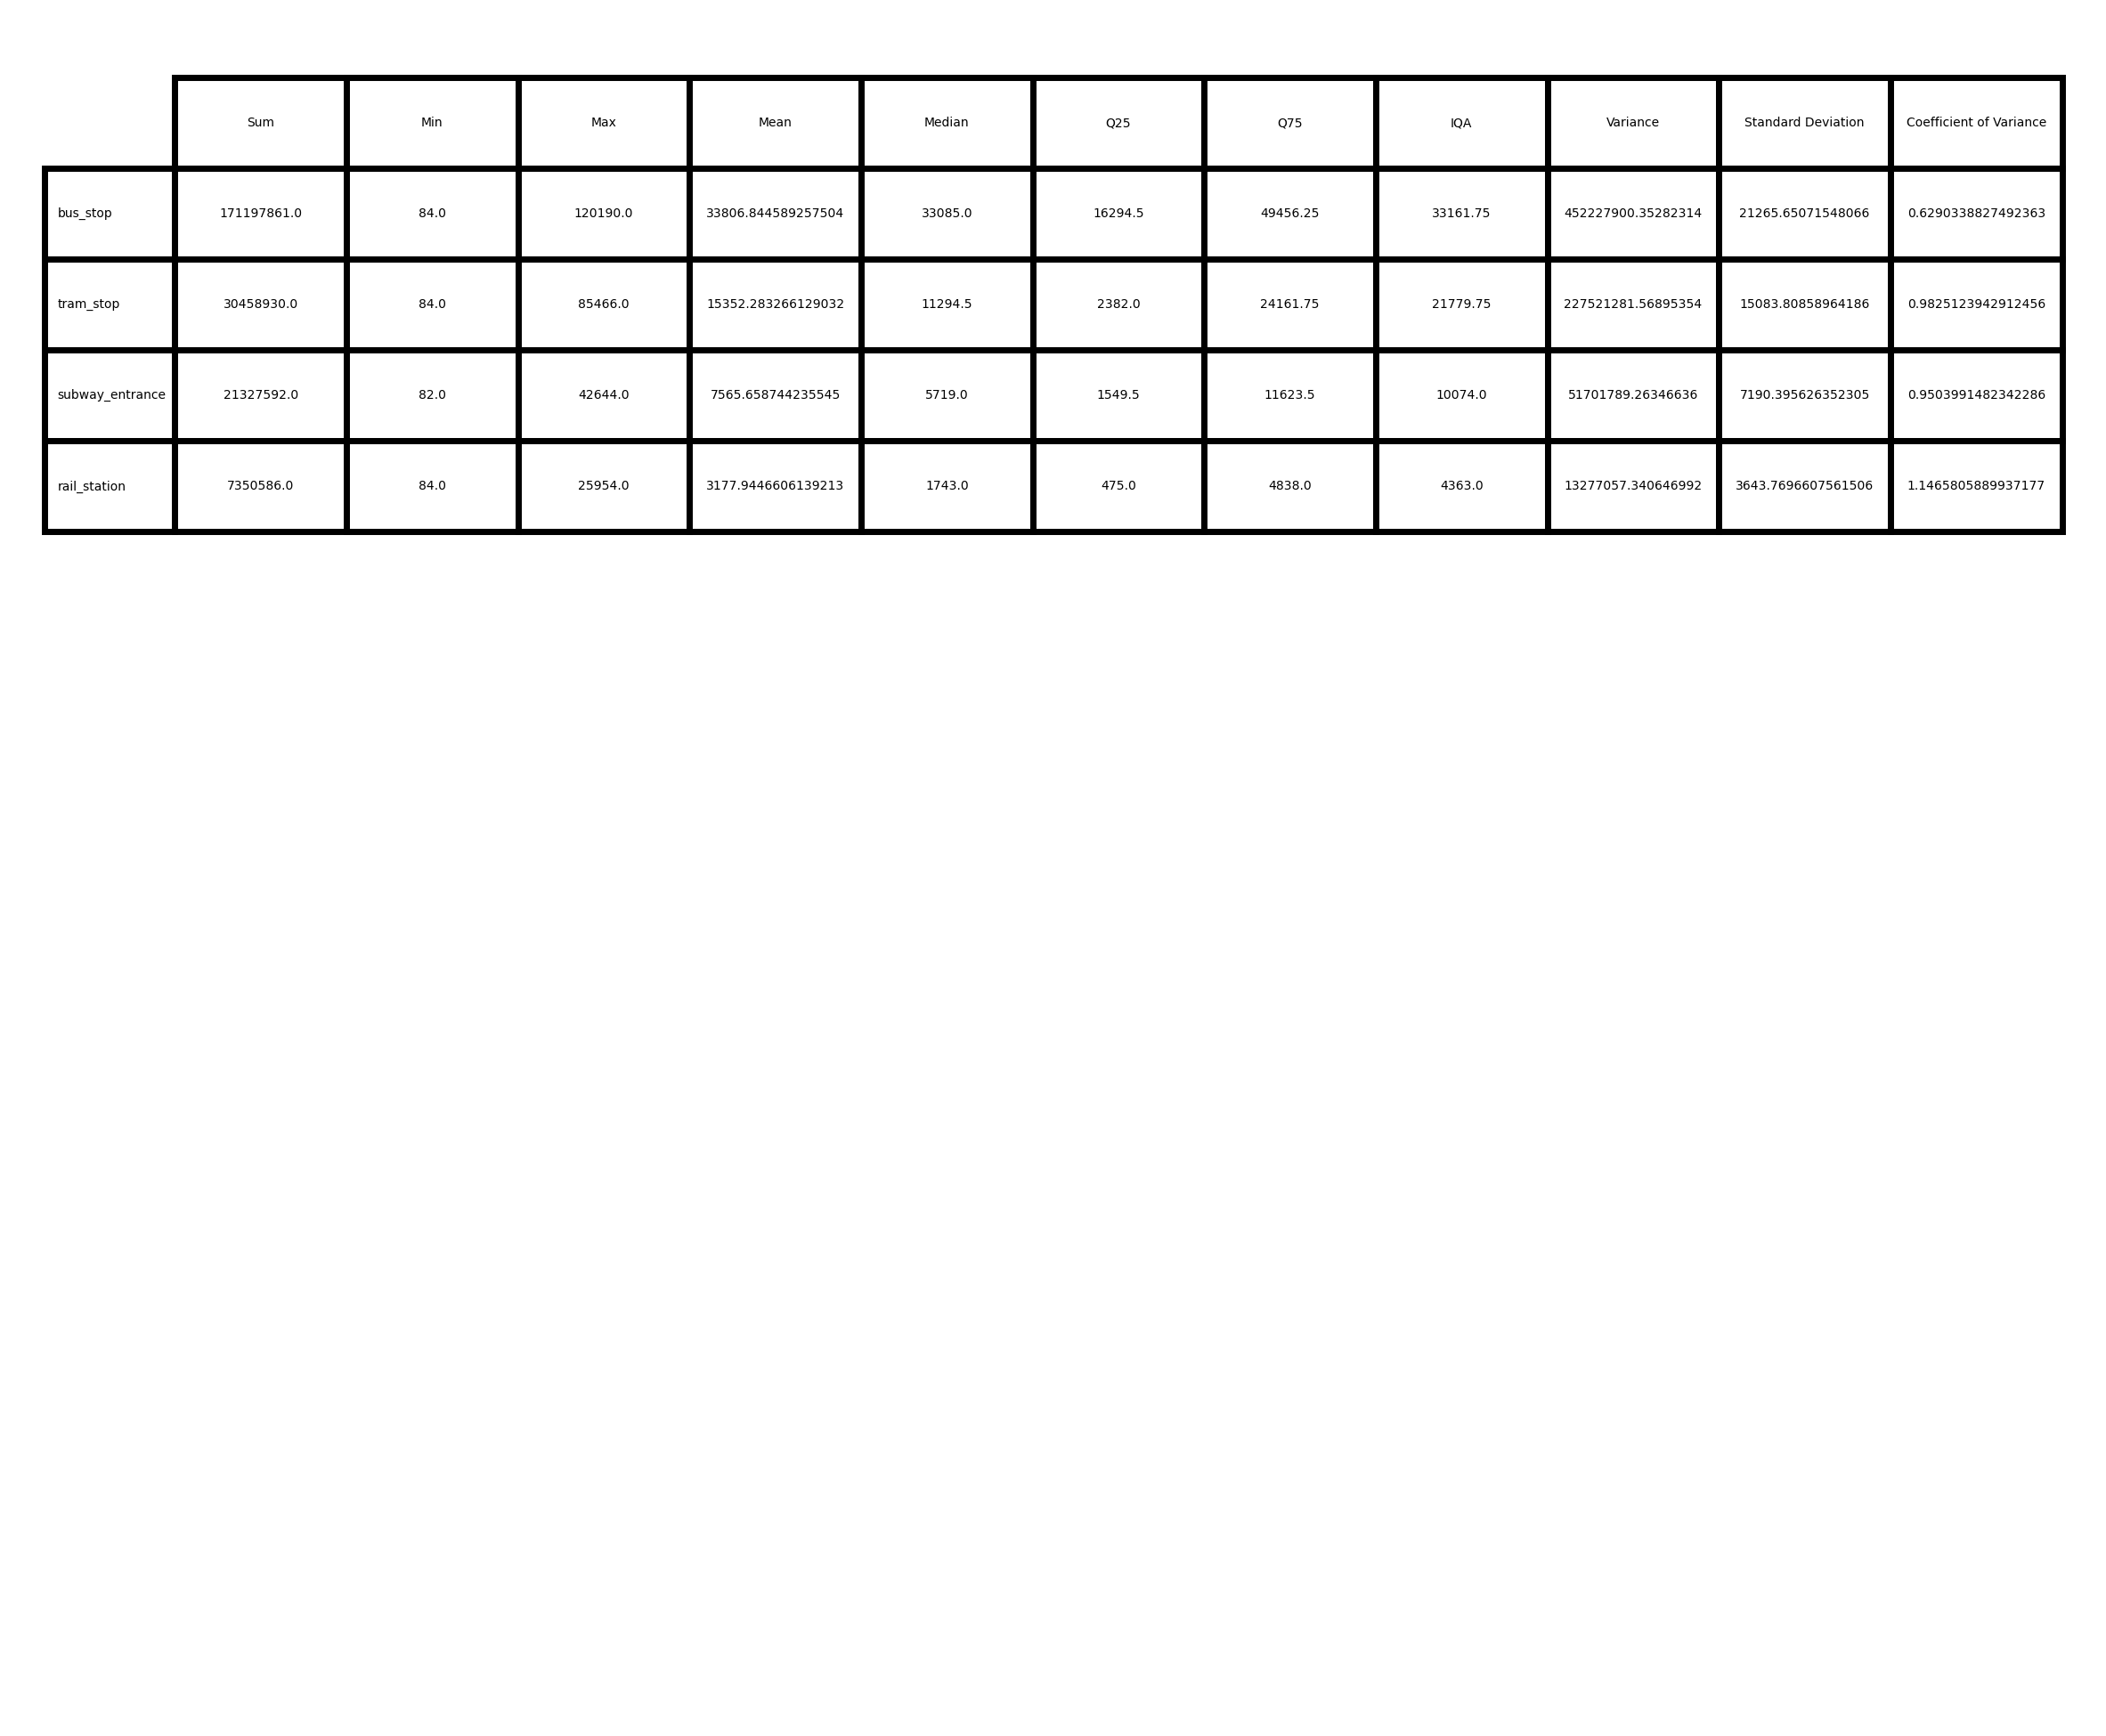

In [8]:
stat(data,amenities_transport)

In [9]:
def stat(data, amenities, column1, column2):
    val = []
    columns = ['Sum','Min','Max','Mean','Median','Q25','Q75','IQA','Variance','Standard Deviation','Coefficient of Variance']
    for category in amenities:
        df1 = data[data[column2]>0]
        df2 = df1[df1[column1]==category.lower()]
        ai = df2[column2]
        n_nonzero = np.count_nonzero(ai)
        summ = sum(ai)
        minimum = np.min(ai)
        maximum = np.max(ai)
        mean = sum(ai)/n_nonzero
        q25 = np.quantile(ai,q=0.25)
        q75 = np.quantile(ai,q=0.75)
        iqa = q75-q25
        median = np.median(ai)
        quad = sum(pow((ai-mean),2))
        variance = (1/n_nonzero)*quad
        deviation = np.sqrt(variance)
        covar = deviation/mean
        values = [summ, minimum, maximum, mean, median, q25, q75, iqa, variance, deviation, covar]
        val.append(values)
    print(val)
    fig, ax = plt.subplots(dpi = 500)
    ax.axis('off')
    ax.axis('tight')
    table = ax.table(
        cellText=val,
        rowLabels=amenities,
        colLabels=columns,
        cellLoc='center',
        loc='upper left')
    fig.tight_layout()
    plt.show()

    

column1 = 'amenity'
column2 = 'ai'
stat(data, amenities, column1, column2)

NameError: name 'amenities' is not defined

In [14]:
#Boxplot of accessiblity indeces for different amenity types
def boxplt(data, amenities):
    fig, ax = plt.subplots(dpi=500)
    values = []
    for category in amenities:
        df = data[data[category.lower()]>0]
        ai = df[category.lower()]
        values.append(ai)
    ax.boxplot(values, labels=amenities,whis=2.5,showmeans=True)
    ax.text(pos[tick], .95, upper_labels[tick],
             transform=ax1.get_xaxis_transform(),
             horizontalalignment='center', size='x-small',
             weight=weights[k], color=box_colors[k])
    plt.ylabel('Accessibility Index')
    plt.title('Box Plot: Accessibility Indeces for different amenity types')
    plt.show()

NameError: name 'num_boxes' is not defined

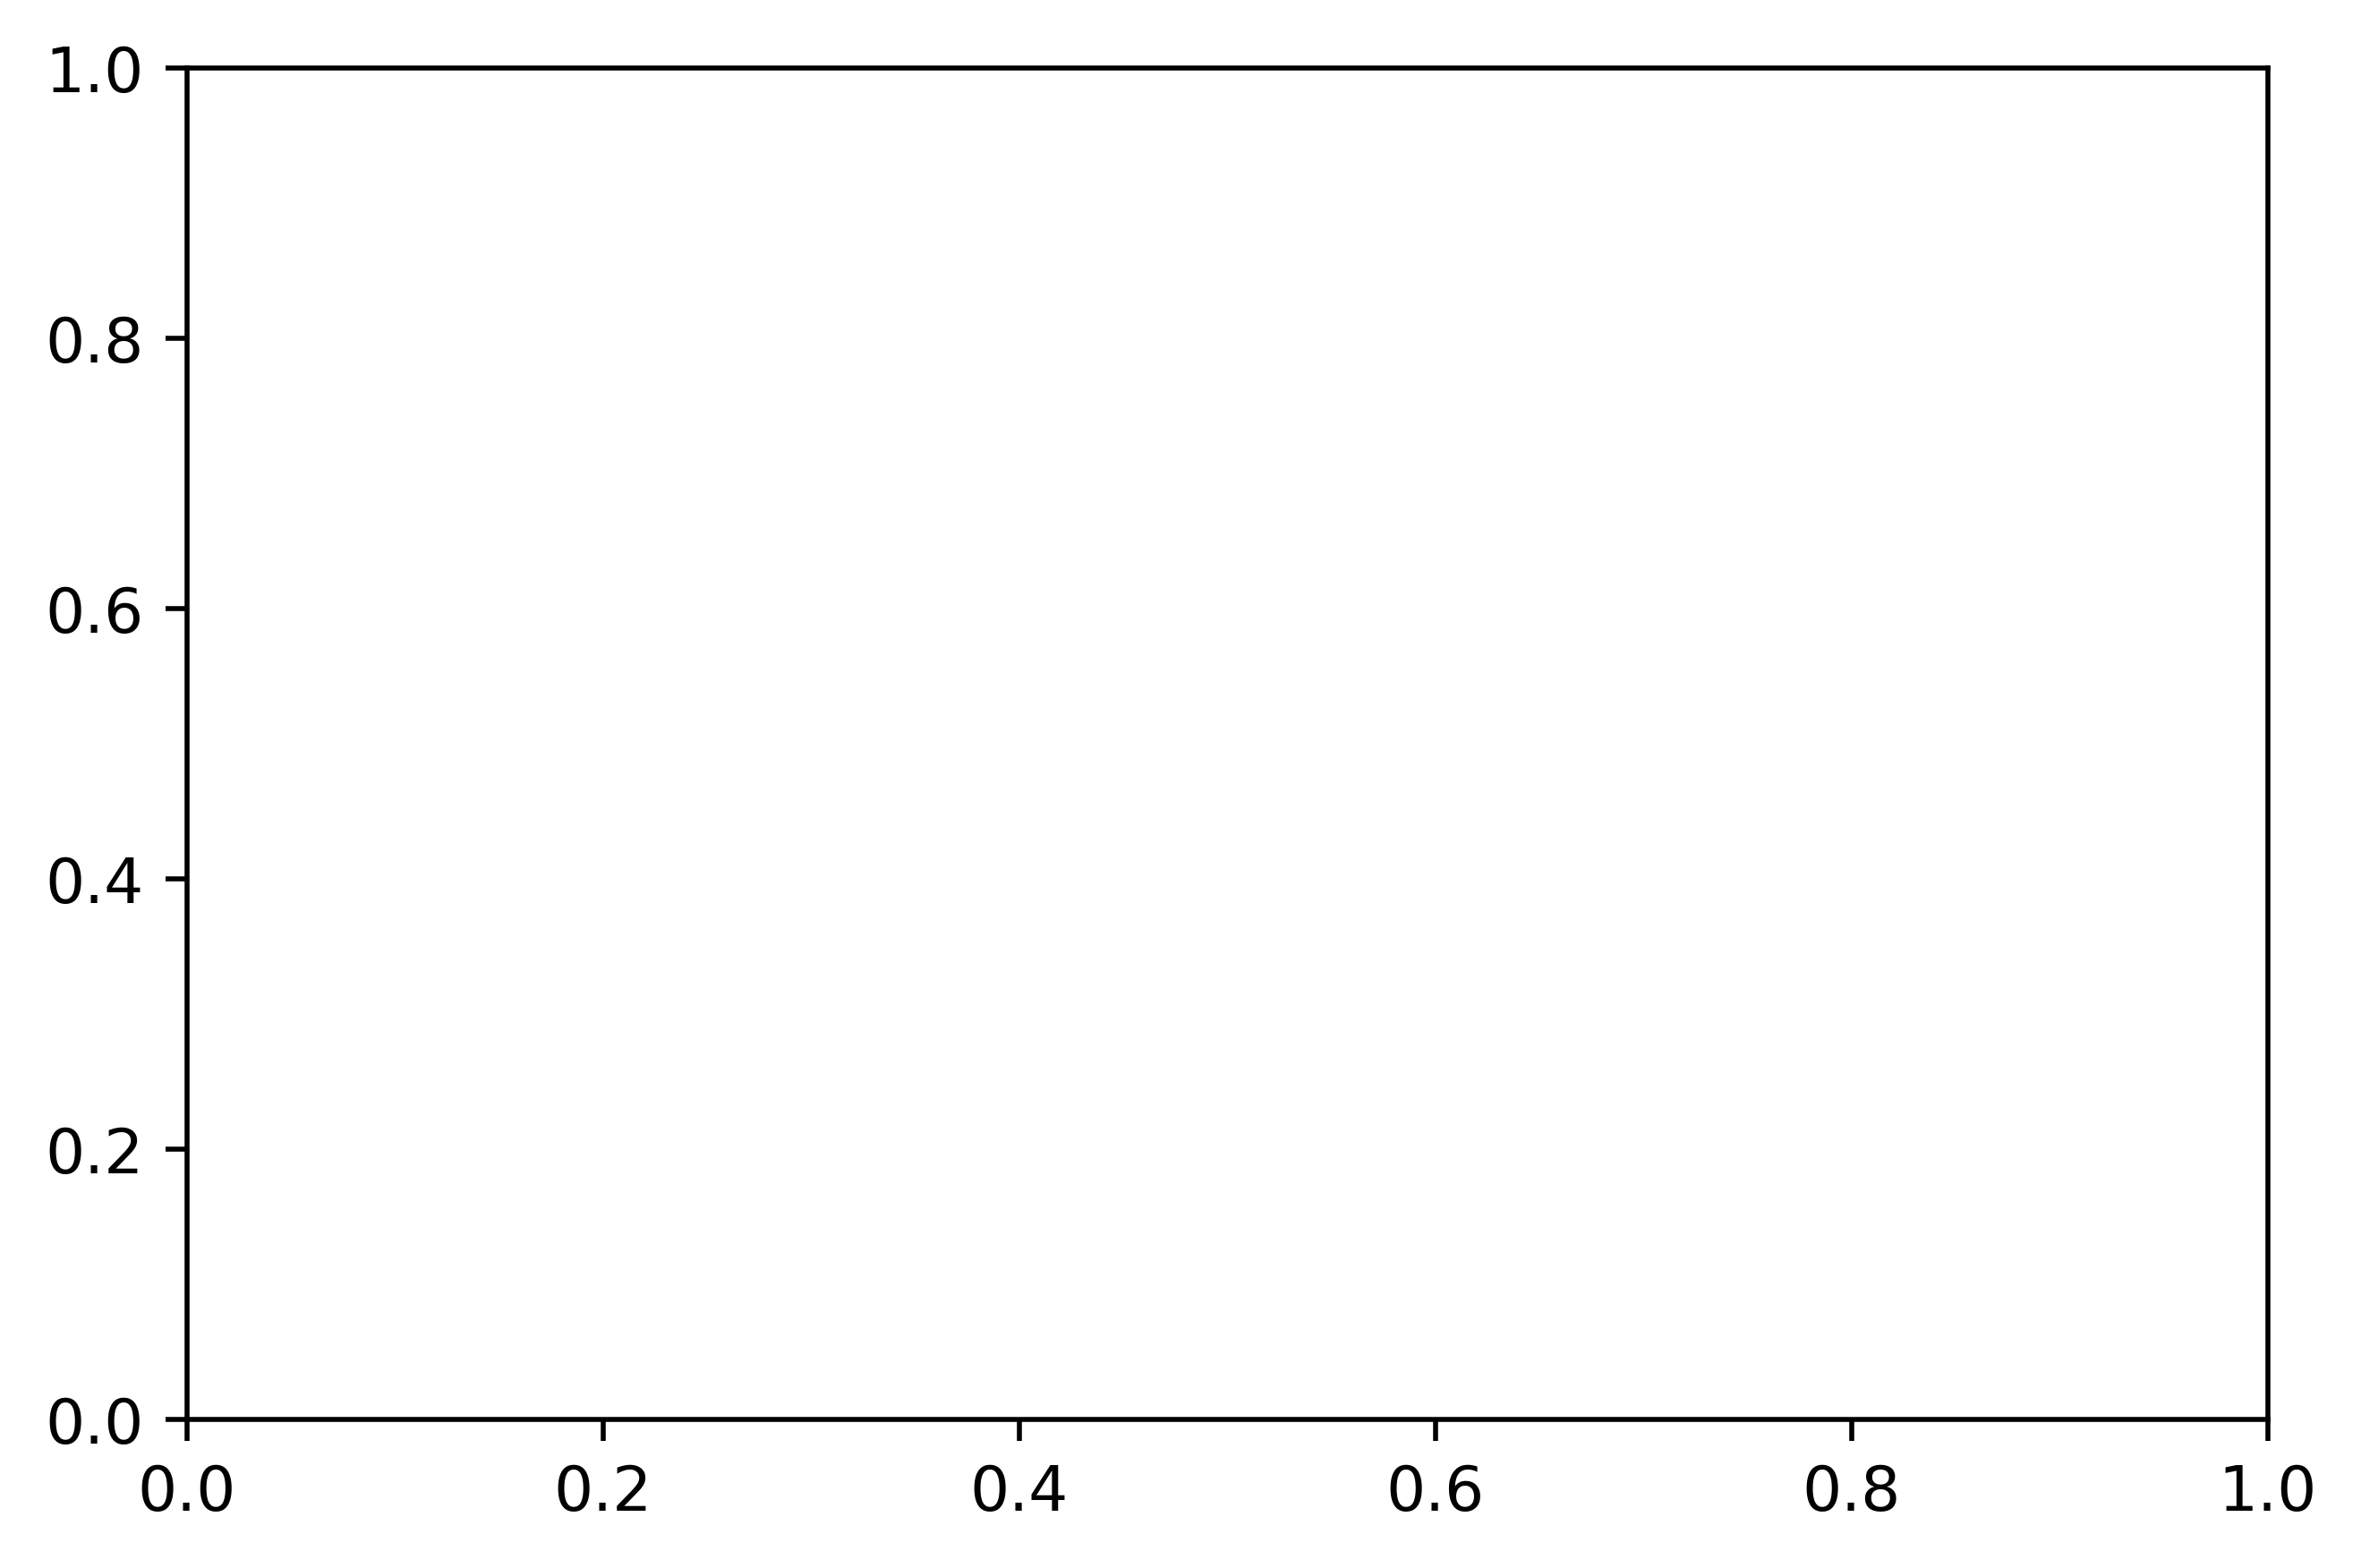

In [15]:
boxplt(data,amenities_food)

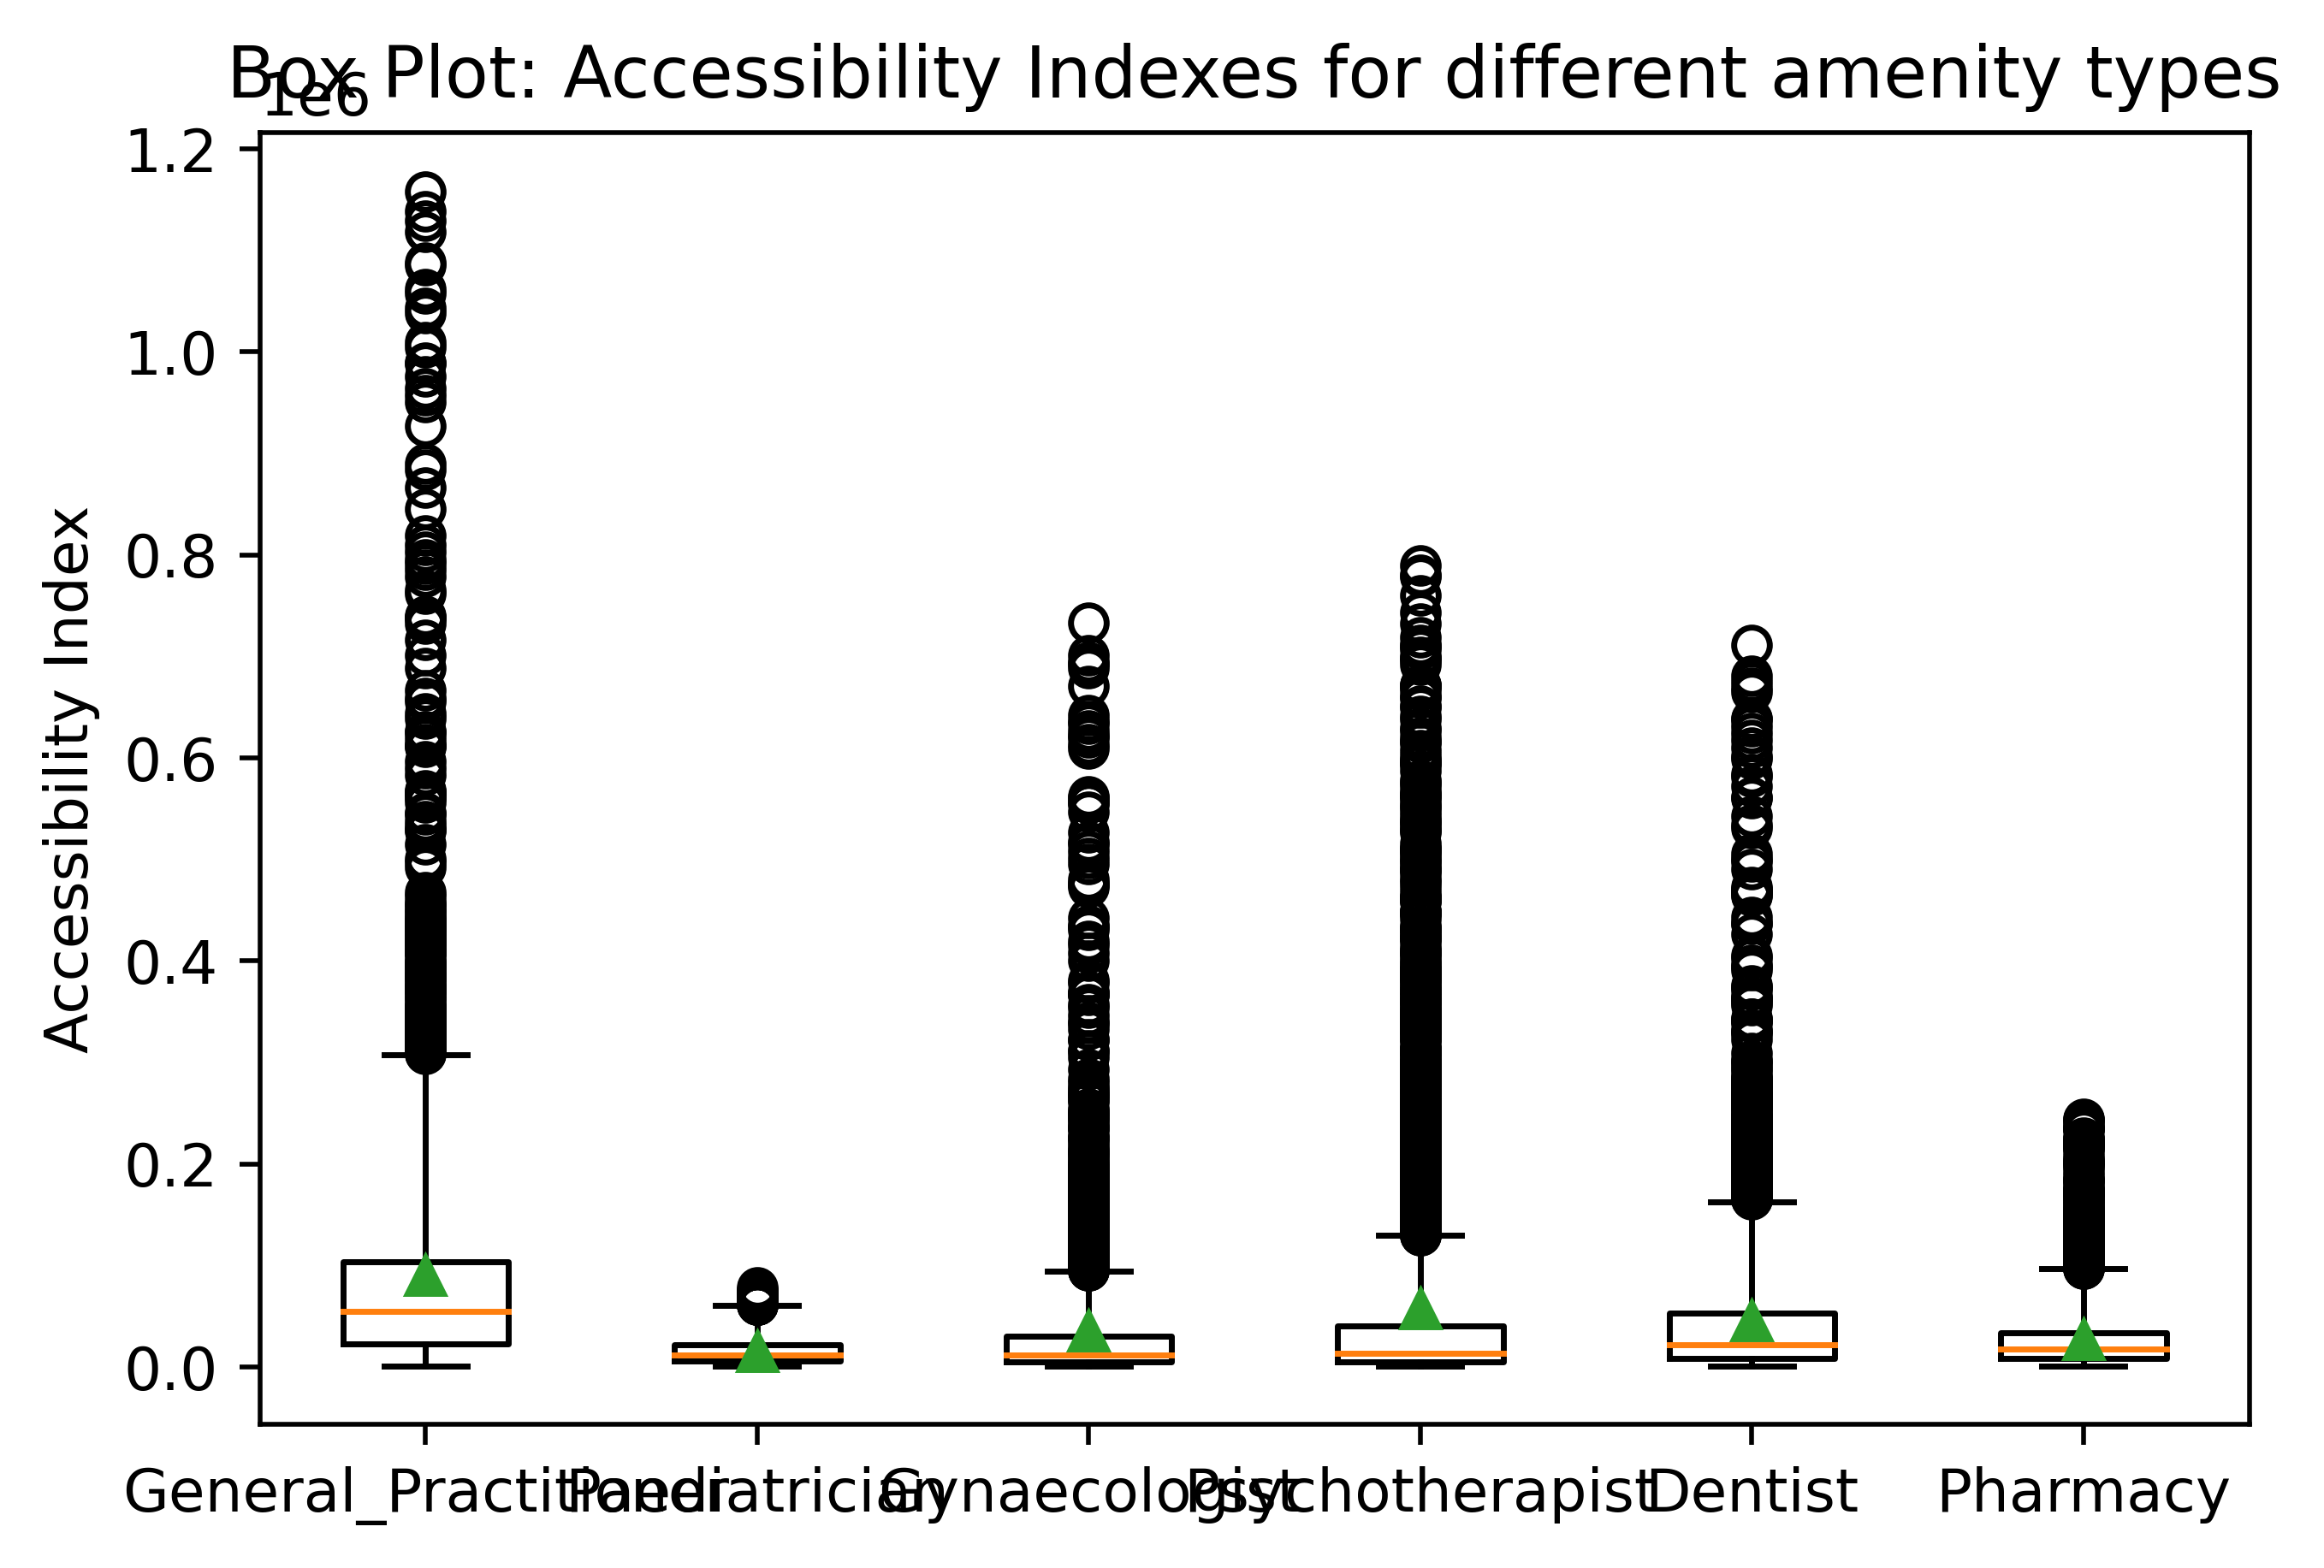

In [17]:
boxplt(data,amenities_health)

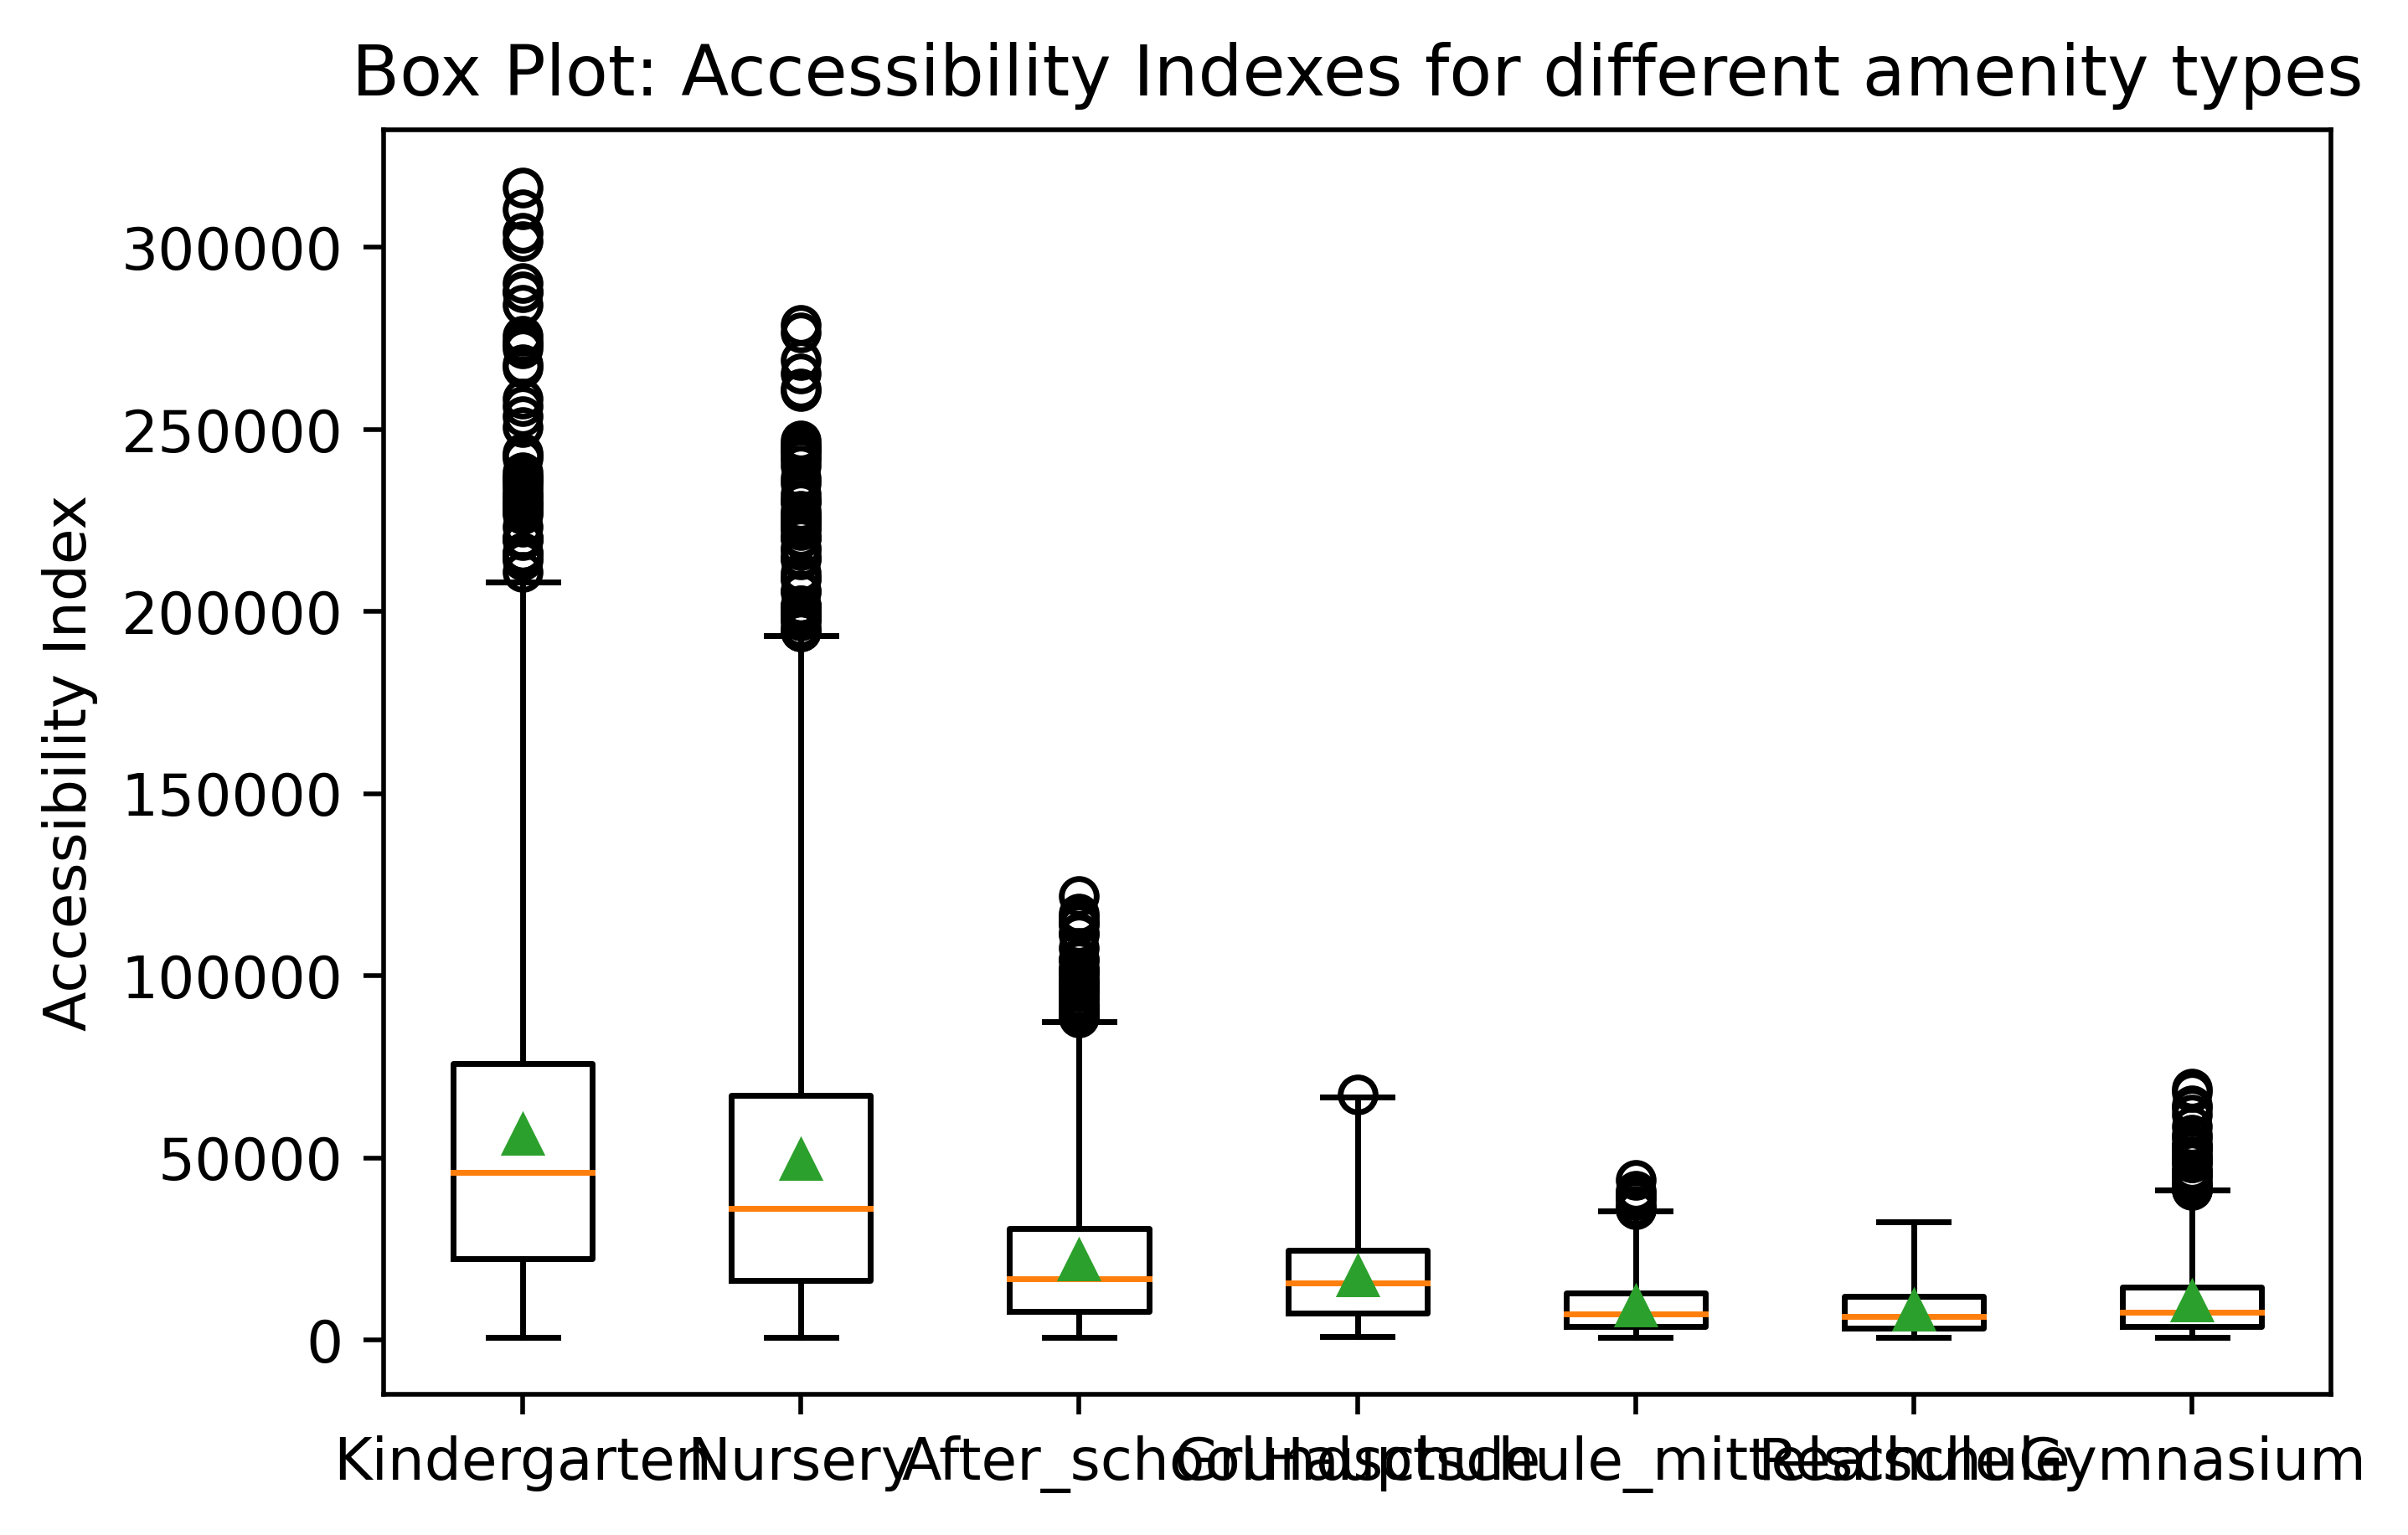

In [18]:
boxplt(data,amenities_education)

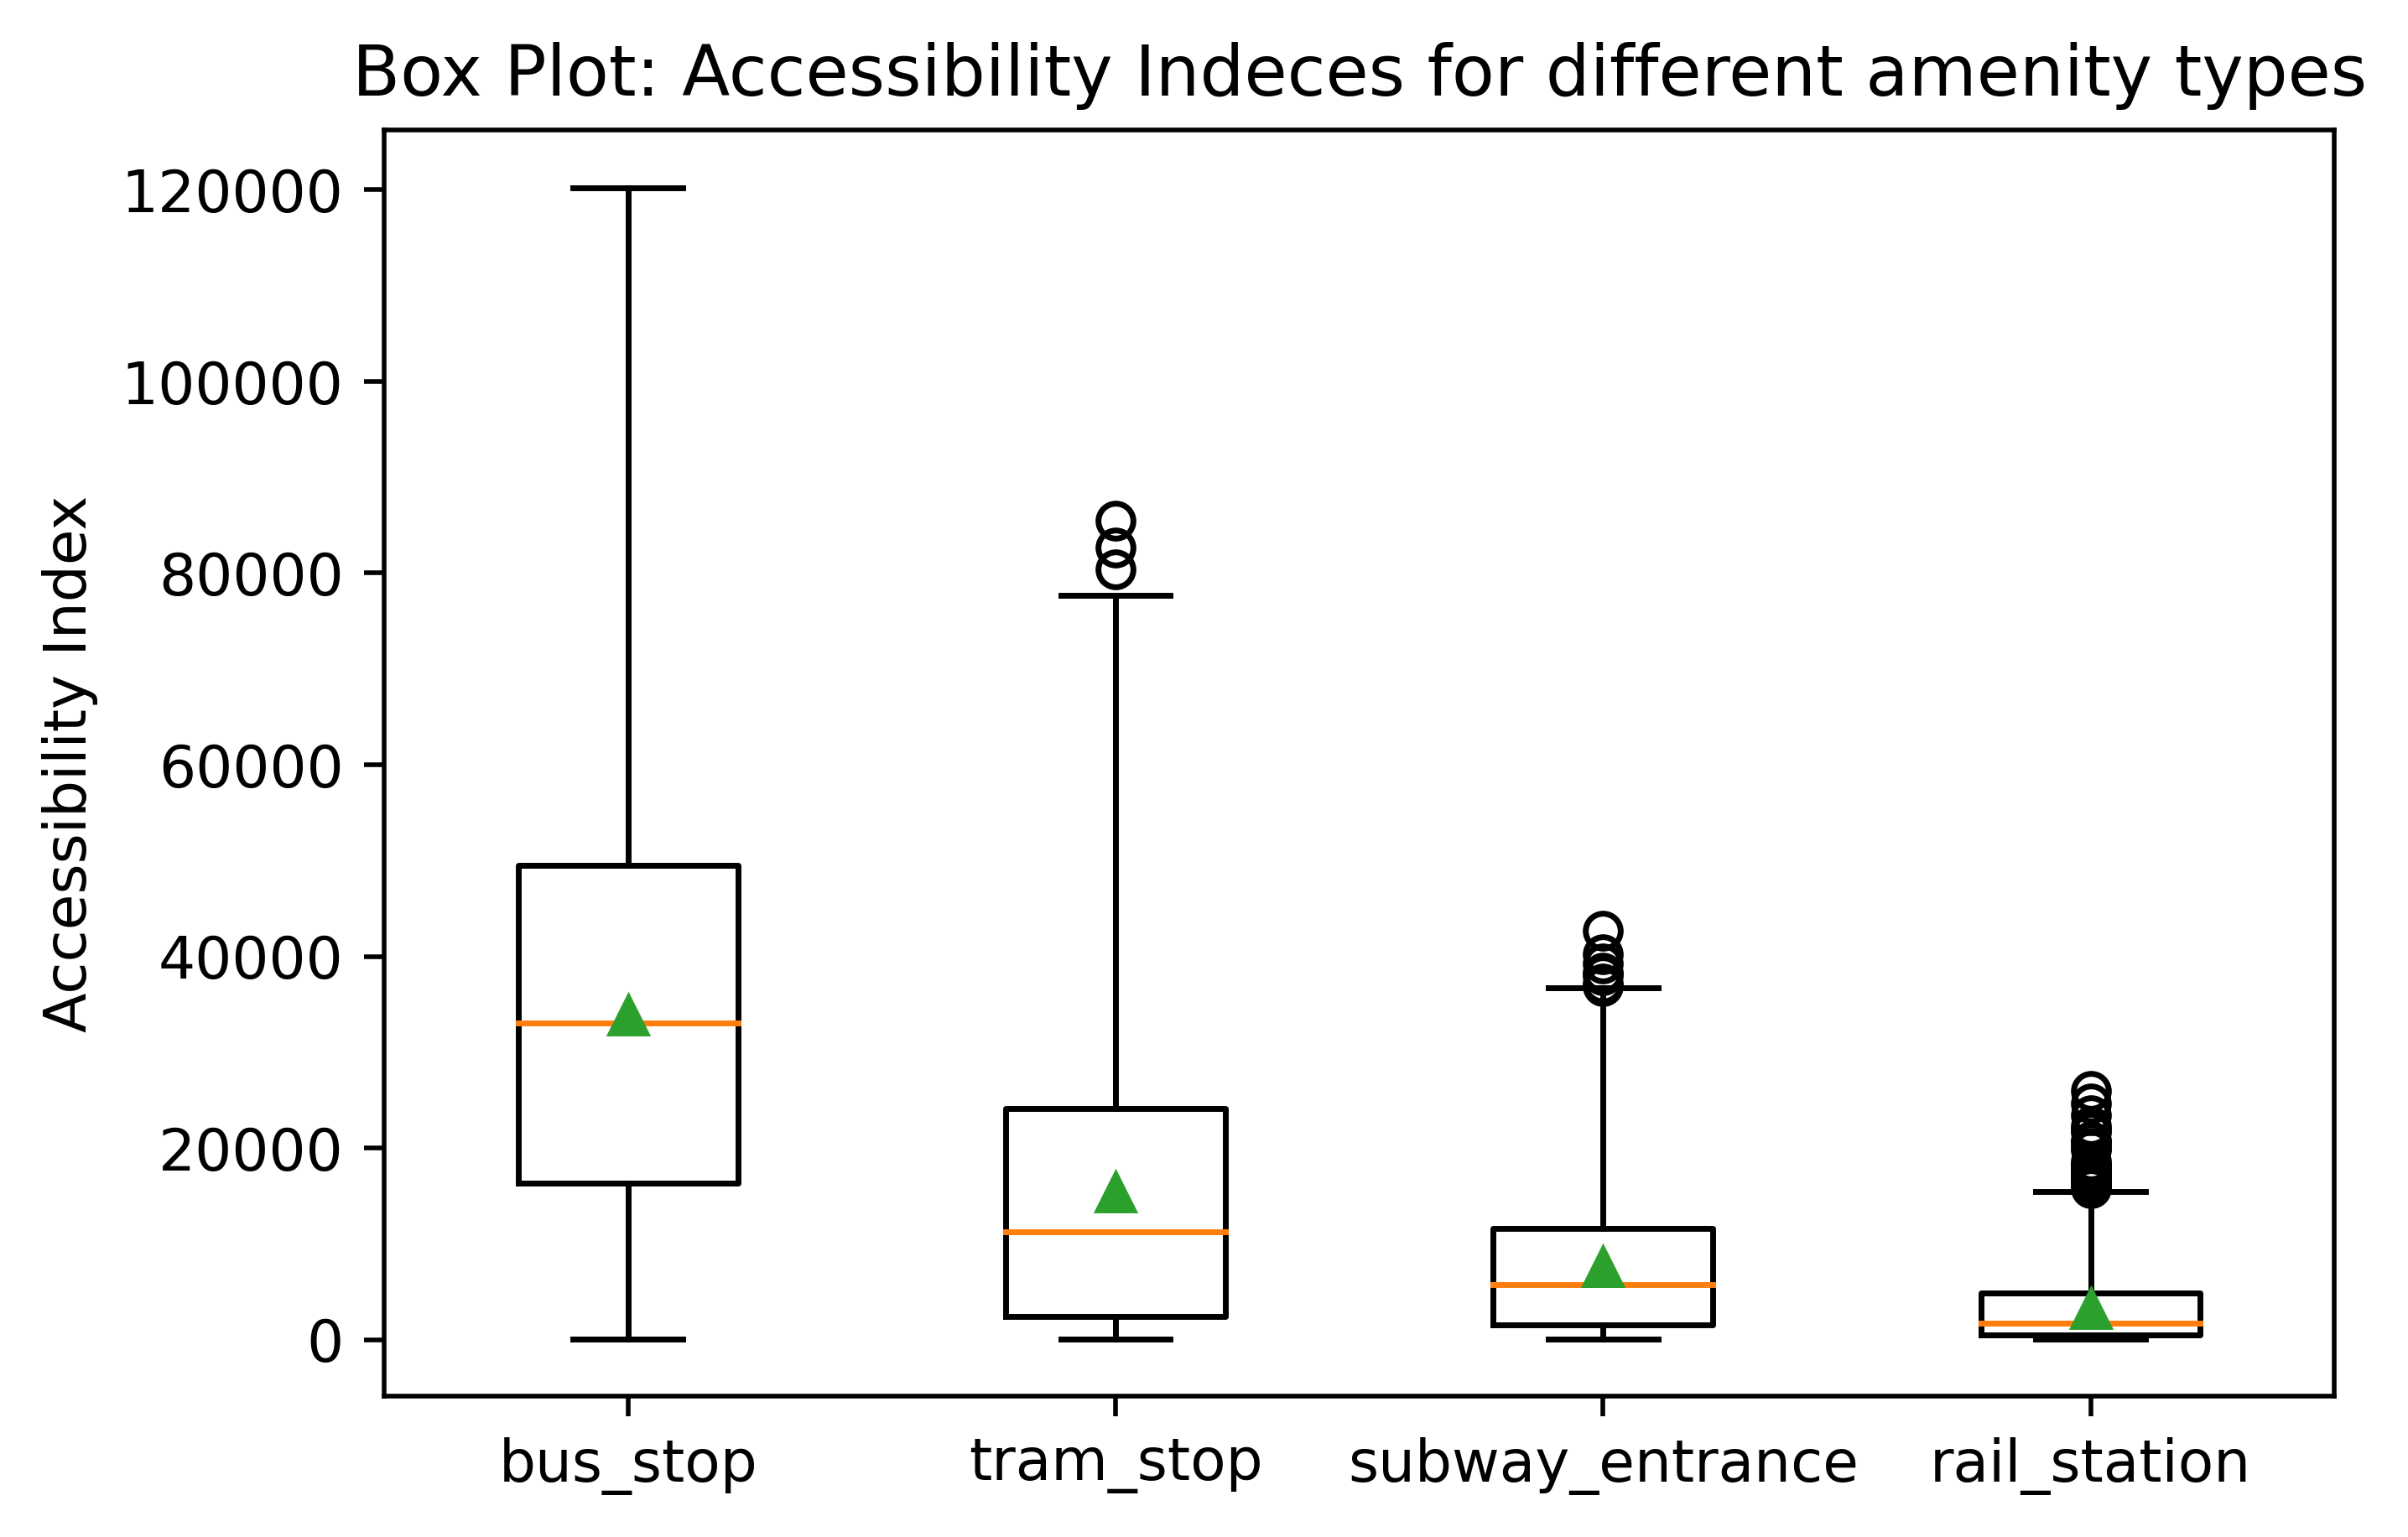

In [7]:
boxplt(data,amenities_transport)

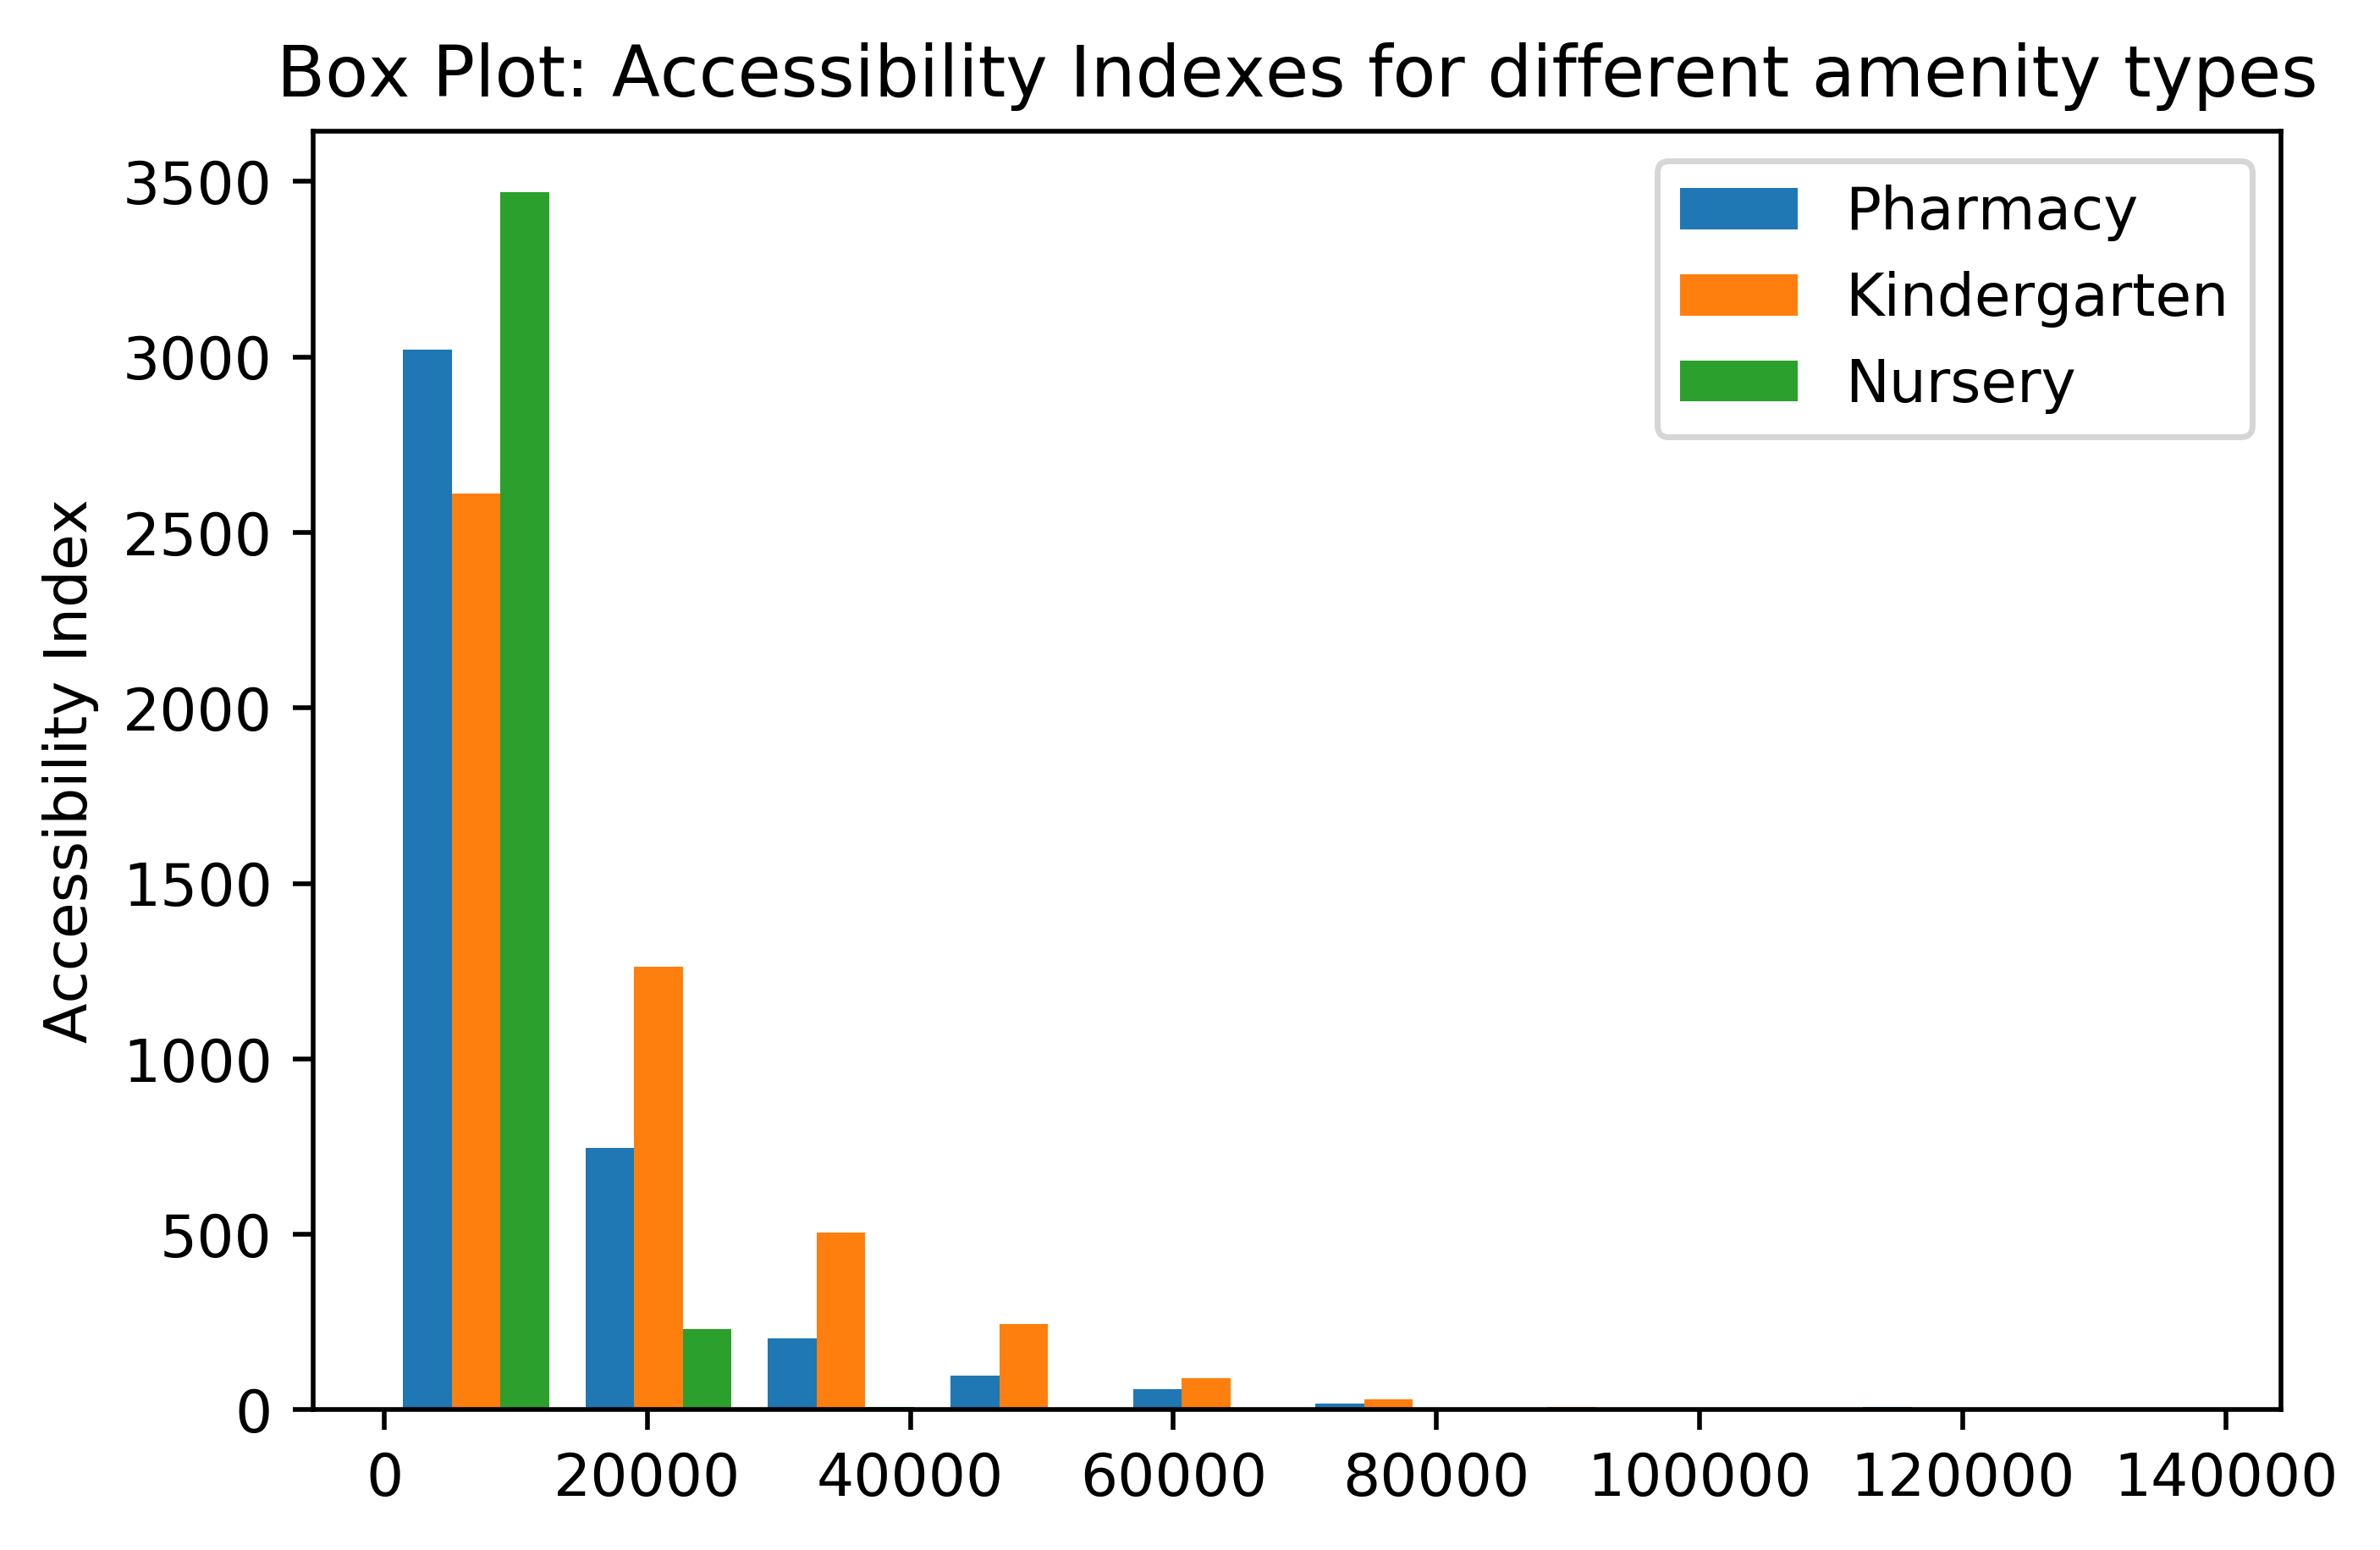

In [45]:
#Histograms of accessiblity indeces for different amenity types
fig, ax = plt.subplots(dpi=500)

#a.add_axes([0.1,0.1,0.8,0.8])
values = []
for category in amenities:
    df = data[data['amenity']==category.lower()]
    ai = df['ai']
    values.append(ai)
ax.hist(values) 
#ax.boxplot(, whis=2.5, showmeans=True)
plt.legend(labels=amenities, loc='upper right')
plt.ylabel('Accessibility Index')
plt.title('Box Plot: Accessibility Indexes for different amenity types')
plt.show()


In [18]:
#Lorenz-Curve
def lorenz(data, amenities, column1, column2, colour):
    a = plt.figure(num=1,dpi=500)
    axes = a.add_axes([0.1,0.1,0.8,0.8])
    axes.set_xlim([0,1])
    axes.set_ylim([0,1])
    axes.set_xlabel('Share of Population')
    axes.set_ylabel('Share of Accessibility')
    axes.grid(True, color ='#EEEEEE')
    perfect_line = plt.plot ([0,1],[0,1], label = 'line of absolute equality', color = 'black')
    for category in amenities:
        df1 = data[data[column1]>0]
        df2 = df1[df1[column2]>0]
        df = df2[df2['amenity']==category.lower()]
        order_ai = df.sort_values(by=[column1], ascending=True)
        order_pop = df.sort_values(by=[column2], ascending=True)
        sum_ai = np.sum(order_ai[column1])
        sum_pop = np.sum(order_ai[column2])
        cumsum_ai = np.cumsum(order_ai[column1])
        cumsum_pop = np.cumsum(order_ai[column2])
        x = cumsum_pop/sum_pop
        y = cumsum_ai/sum_ai
        lorenz = plt.plot(x,y, label = category, color = colour[category])
    plt.legend(loc='upper left')
    plt.show()

colour = {"Kindergarten":"#E37222", "Nursery":"#A2AD00", "Pharmacy":"#64A0C8"}
column1 = 'ai'
column2 = 'population'
lorenz(data, amenities, column1, column2, colour)

SyntaxError: invalid syntax (<ipython-input-18-29b7b27e3203>, line 23)

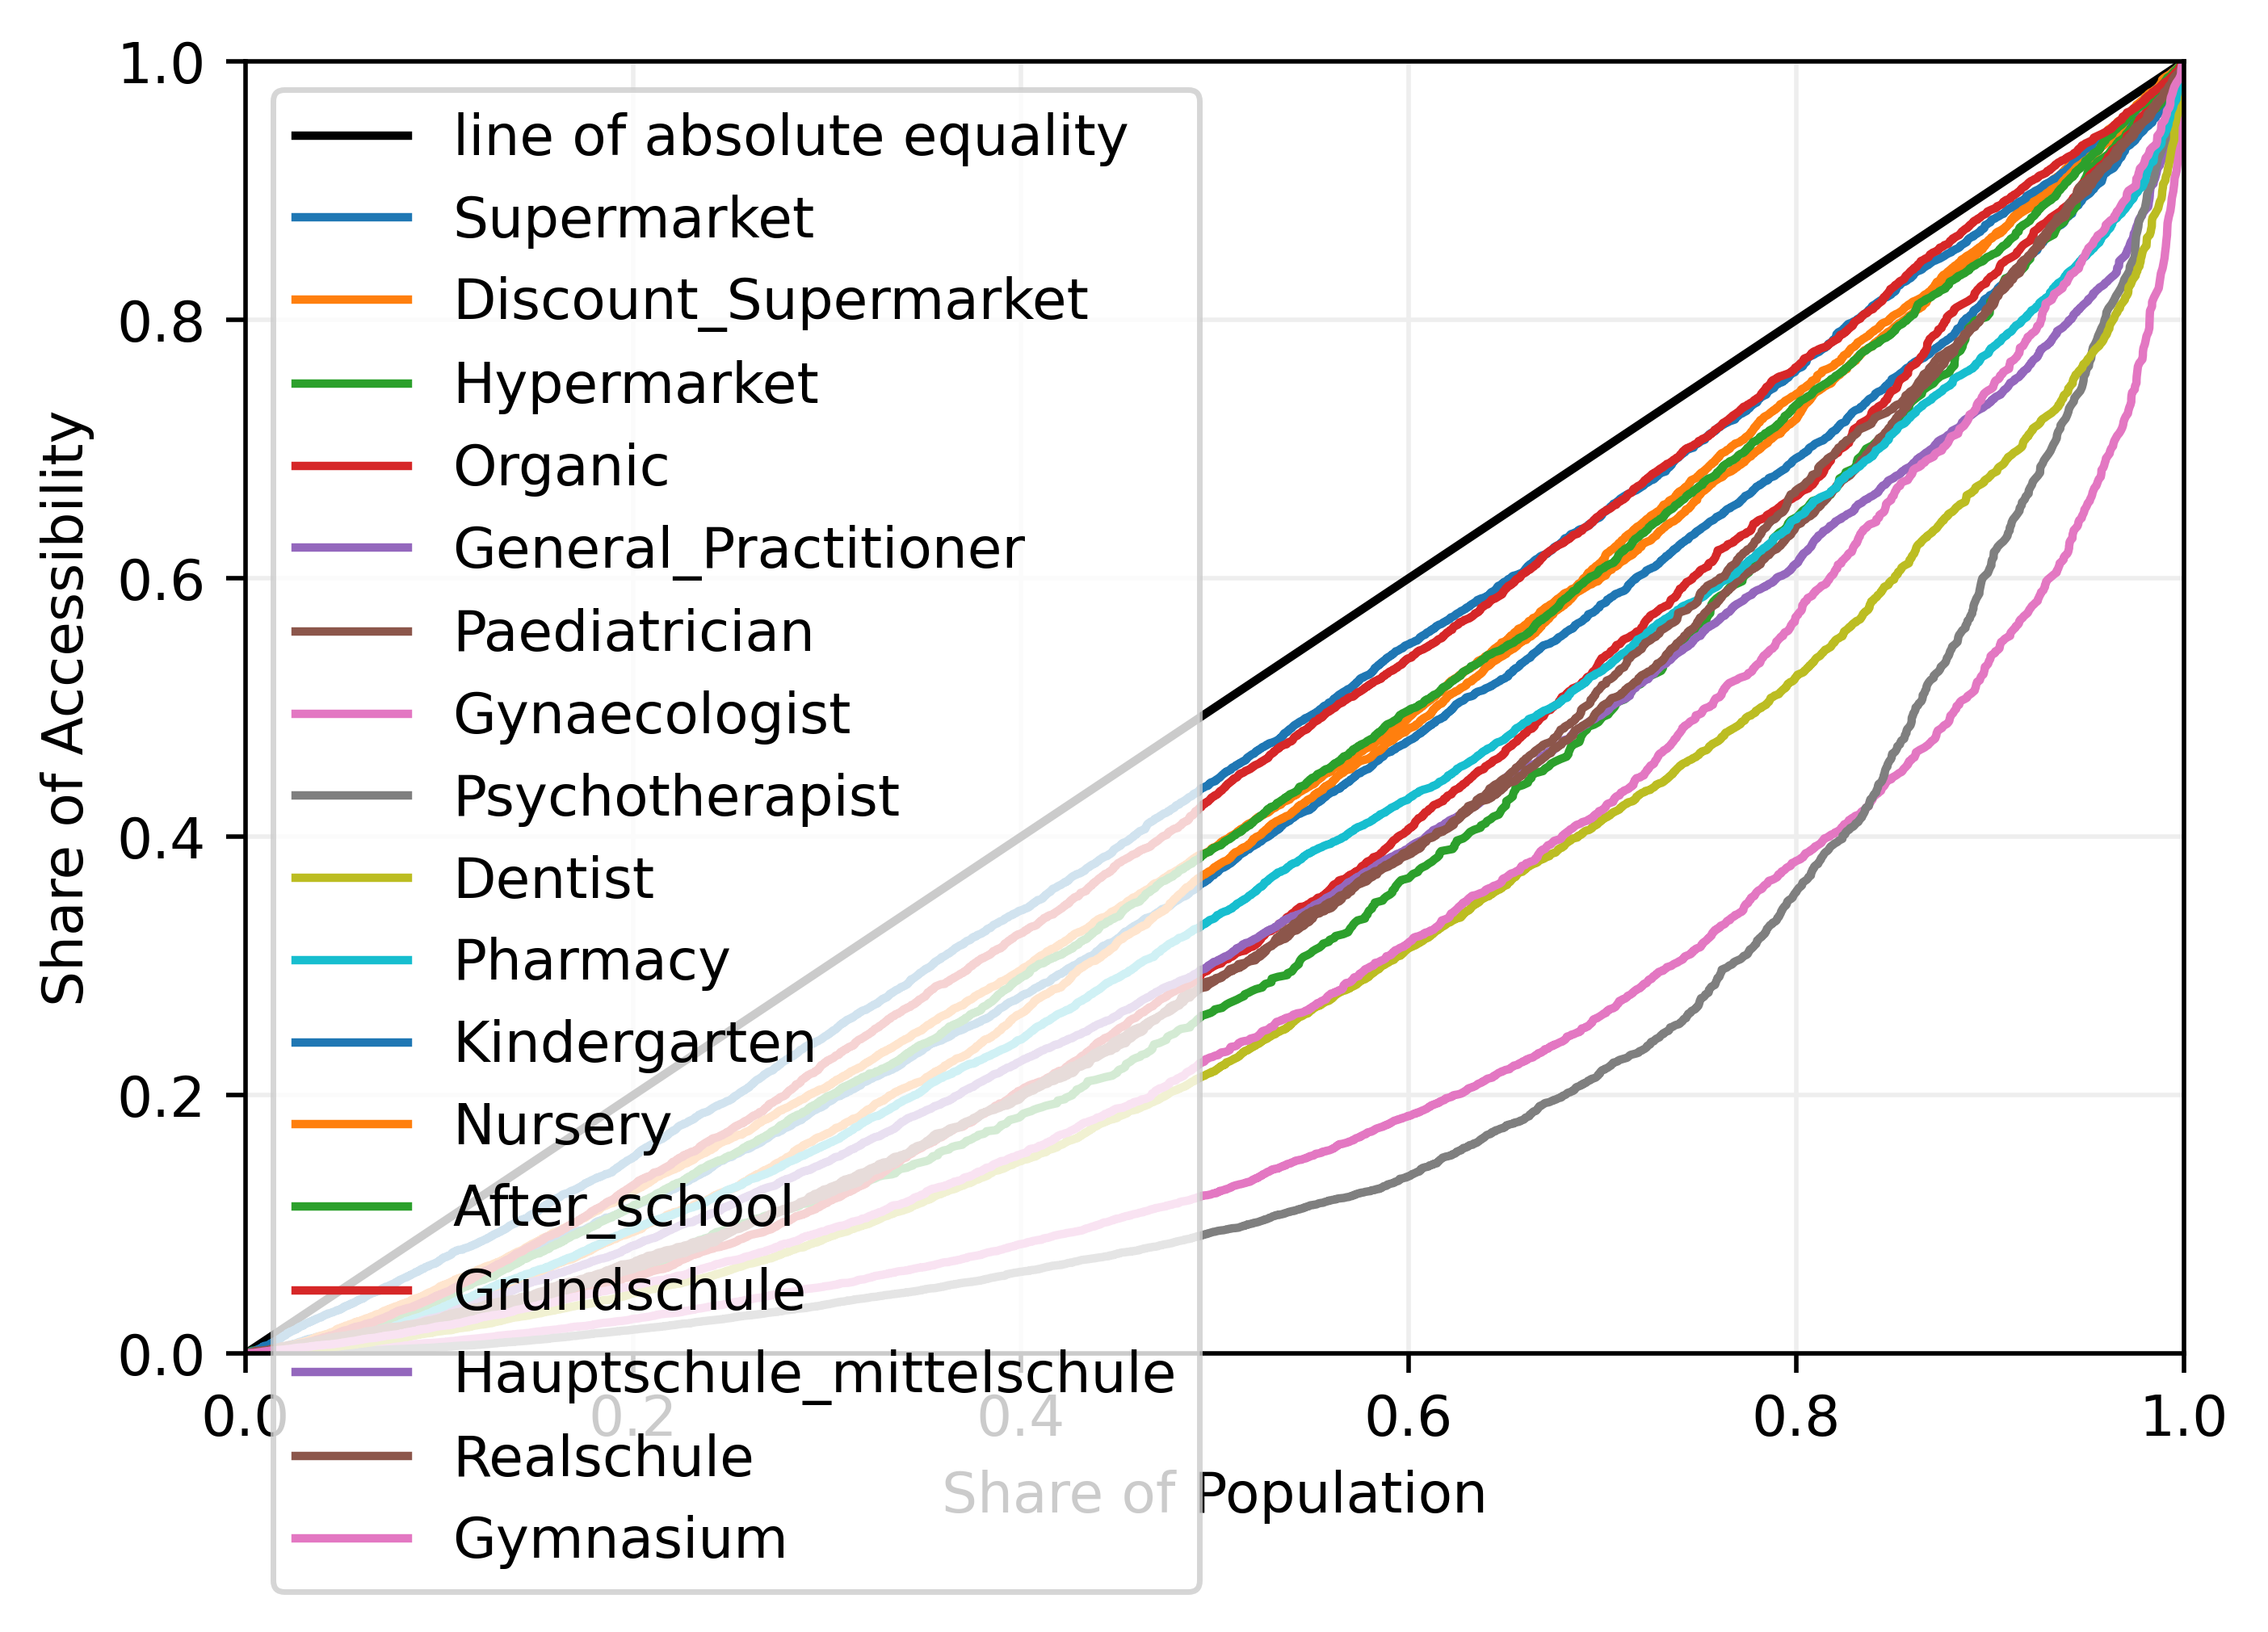

In [19]:
#Lorenz-Curve
def lorenz(data, amenities, column1, column2):
    a = plt.figure(num=1,dpi=500)
    axes = a.add_axes([0.1,0.1,0.8,0.8])
    axes.set_xlim([0,1])
    axes.set_ylim([0,1])
    axes.set_xlabel('Share of Population')
    axes.set_ylabel('Share of Accessibility')
    axes.grid(True, color ='#EEEEEE')
    perfect_line = plt.plot ([0,1],[0,1], label = 'line of absolute equality', color = 'black')
    for category in amenities:
        df1 = data[data[column1]>0]
        df2 = df1[df1[column2]>0]
        df = df2[df2['amenity']==category.lower()]
        order_ai = df.sort_values(by=[column1], ascending=True)
        order_pop = df.sort_values(by=[column2], ascending=True)
        sum_ai = np.sum(order_ai[column1])
        sum_pop = np.sum(order_ai[column2])
        cumsum_ai = np.cumsum(order_ai[column1])
        cumsum_pop = np.cumsum(order_ai[column2])
        x = cumsum_pop/sum_pop
        y = cumsum_ai/sum_ai
        lorenz = plt.plot(x,y, label = category)
    plt.legend(loc='upper left')
    plt.show()

#colour = {"Kindergarten":"#E37222", "Nursery":"#A2AD00", "Pharmacy":"#64A0C8"}
column1 = 'ai'
column2 = 'population'
lorenz(data, amenities, column1, column2)

In [20]:
#Gini-Coefficient
def gini (data, amenities, column1, column2):
    for category in amenities:
        df1 = data[data[column1]>0]
        df2 = df1[df1[column2]>0]
        df = df2[df2['amenity']==category.lower()]
        order_ai = df.sort_values(by=[column1], ascending=True)
        order_pop = df.sort_values(by=[column2], ascending=True)
        sum_ai = np.sum(order_ai[column1])
        sum_pop = np.sum(order_ai[column2])
        cumsum_ai = list(np.cumsum(order_ai[column1]))
        cumsum_pop = list(np.cumsum(order_ai[column2]))
        x = list(cumsum_pop/sum_pop)
        y = list(cumsum_ai/sum_ai)
        for i in range(len(cumsum_ai)):
            if i < 1:
                kf = 0
            if i >= 1:
                kf = kf + 0.5 * (y[i-1]+y[i]) * (x[i]-x[i-1])
        kf = 0.5 - kf
        gini = kf*((2*np.count_nonzero(df))/(np.count_nonzero(df)-1))
        print(category, gini)
        
gini(data, amenities, column1, column2)



Supermarket 0.1904761779630909
Discount_Supermarket 0.18006653214423138
Hypermarket 0.30861205812102427
Organic 0.27518325752351974
General_Practitioner 0.3036038591416111
Paediatrician 0.2950152141187496
Gynaecologist 0.5892743942950923
Psychotherapist 0.6038408893920486
Dentist 0.42327056982265904
Pharmacy 0.25554810262600725
Kindergarten 0.0829595365748805
Nursery 0.14494420933169283
After_school 0.15807573880455397
Grundschule 0.10409548534765677
Hauptschule_mittelschule -0.0
Realschule 0.2852147366835117
Gymnasium 0.38364501150530006
